# Price Optimisation based on price elasticity of Demand

El propósito principal del ejercicio es evaluar la calidad entre los modelos de ML y no ML propuestos en la iniciativa aplicados en la elasticidad de la demanda. 

Los modelos propuestos son:

1. Regresión lineal simple
2. Modelo de relación lineal sin ML
3. Modelo ARIMA 
4. Regresión lineal múltiple
5. Random Forrest
 . 
 .
 .
+ TBD 

Los datos a manejar serán los mismos para todos los modelos y se aplicará el mismo preprocesamiento de la información


### Introducción

Pricing a product is a crucial aspect in any business. Alot of thought process is out into it. There are different strategies to price different kinds of products. There are products whose sales are quite sensitive to their prices and as such a small change in their price can lead to noticeab
le change in their sales. While there are products whose sales are not much affected by their price - these tend to be either luxury items or necessities (like certain medicines). This notebook will focus on the former type of products.

Price elasticity of demand (Epd), or elasticity, is the degree to which the effective desire for something changes as its price changes. In general, people desire things less as those things become more expensive. However, for some products, the customer's desire could drop sharply even with a little price increase, and for other products, it could stay almost the same even with a big price increase. Economists use the term elasticity to denote this sensitivity to price increases. More precisely, price elasticity gives the percentage change in quantity demanded when there is a one percent increase in price, holding everything else constant.

Mathematically speaking, the price elasticity of demand is defined to be the percentage change in quantity demanded, q,divided by the percentage change in price, p. The formula for the price elasticity (ǫ) is: $$e = \%ΔQ/ \%ΔP$$


In [228]:
# Import the reqiured libraries
import pandas as pd
import numpy as np
import statsmodels.api as sm
from statsmodels.formula.api import ols
import matplotlib.pyplot as plt
import seaborn as sns; sns.set(style="ticks", color_codes=True)
from statsmodels.tsa.arima_model import ARIMA

In [229]:
from pmdarima import auto_arima
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.seasonal import seasonal_decompose

In [230]:
dfIPC = pd.read_excel(r'C:\Users\AW581PP\OneDrive - EY\Documents\EY D&A\nocode-ml-example\Model comparasions\AdditionalFeatures\IPCConsulta_20230305-211405565.xlsx', sheet_name="Hoja1")

In [231]:
## Get multiple outputs in the same cell
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

## Ignore all warnings
import warnings
warnings.filterwarnings('ignore')
warnings.filterwarnings(action='ignore', category=DeprecationWarning)

In [232]:
## Display all rows and columns of a dataframe instead of a truncated version
from IPython.display import display
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [265]:
Burger_1070 = pd.read_csv(r'C:\Users\AW581PP\OneDrive - EY\Documents\EY D&A\nocode-ml-example\Model comparasions\processedDataSets\Burger_1070.csv')
Burger_2051 = pd.read_csv(r'C:\Users\AW581PP\OneDrive - EY\Documents\EY D&A\nocode-ml-example\Model comparasions\processedDataSets\Burger_2051.csv')
Burger_2052 = pd.read_csv(r'C:\Users\AW581PP\OneDrive - EY\Documents\EY D&A\nocode-ml-example\Model comparasions\processedDataSets\Burger_2052.csv')
Burger_2053 = pd.read_csv(r'C:\Users\AW581PP\OneDrive - EY\Documents\EY D&A\nocode-ml-example\Model comparasions\processedDataSets\Burger_2053.csv')
lemonade_data_2052 = pd.read_csv(r'C:\Users\AW581PP\OneDrive - EY\Documents\EY D&A\nocode-ml-example\Model comparasions\processedDataSets\lemonade_data_2052.csv')
coke_data_2053 = pd.read_csv(r'C:\Users\AW581PP\OneDrive - EY\Documents\EY D&A\nocode-ml-example\Model comparasions\processedDataSets\coke_data_2053.csv')
coke_data_2051 = pd.read_csv(r'C:\Users\AW581PP\OneDrive - EY\Documents\EY D&A\nocode-ml-example\Model comparasions\processedDataSets\coke_data_2051.csv')

In [266]:
lstPreprocessed = [Burger_1070,Burger_2051,Burger_2052,Burger_2053,lemonade_data_2052,coke_data_2053,coke_data_2051]

In [267]:
for i,x in enumerate(lstPreprocessed):
    lstPreprocessed[i]['CALENDAR_DATE'] = pd.to_datetime(lstPreprocessed[i]['CALENDAR_DATE'])
    lstPreprocessed[i].rename(columns={"CALENDAR_DATE": "Fecha"}, inplace=True)
    lstPreprocessed[i] = lstPreprocessed[i].sort_values('Fecha')



In [268]:
Burger_1070 = pd.merge(Burger_1070,dfIPC,how='left',on='Fecha')
Burger_2051 = pd.merge(Burger_2051,dfIPC,how='left',on='Fecha')
Burger_2052 = pd.merge(Burger_2052,dfIPC,how='left',on='Fecha')
Burger_2053 = pd.merge(Burger_2053,dfIPC,how='left',on='Fecha')
lemonade_data_2052 = pd.merge(lemonade_data_2052,dfIPC,how='left',on='Fecha')
coke_data_2053 = pd.merge(coke_data_2053,dfIPC,how='left',on='Fecha')
coke_data_2051 = pd.merge(coke_data_2051,dfIPC,how='left',on='Fecha')

In [269]:
#JOIN IPC DATA A EL DF

In [270]:
Burger_1070.set_index('Fecha',inplace=True)
Burger_2051.set_index('Fecha',inplace=True)
Burger_2052.set_index('Fecha',inplace=True)
Burger_2053.set_index('Fecha',inplace=True)
lemonade_data_2052.set_index('Fecha',inplace=True)
coke_data_2051.set_index('Fecha',inplace=True)
coke_data_2053.set_index('Fecha',inplace=True)

In [271]:
Burger_1070.sort_index(inplace=True)
Burger_2051.sort_index(inplace=True)
Burger_2052.sort_index(inplace=True)
Burger_2053.sort_index(inplace=True)
lemonade_data_2052.sort_index(inplace=True)
coke_data_2051.sort_index(inplace=True)
coke_data_2053.sort_index(inplace=True)


In [272]:
Burger_1070.interpolate(method='linear', inplace=True)
Burger_2051.interpolate(method='linear', inplace=True)
Burger_2052.interpolate(method='linear', inplace=True)
Burger_2053.interpolate(method='linear', inplace=True)
lemonade_data_2052.interpolate(method='linear', inplace=True)
coke_data_2051.interpolate(method='linear', inplace=True)
coke_data_2053.interpolate(method='linear', inplace=True)

In [275]:
Burger_1070.head(10)

,Unnamed: 0,SELL_ID,SELL_CATEGORY,ITEM_NAME,PRICE,QUANTITY,YEAR,HOLIDAY,IS_WEEKEND,IS_SCHOOLBREAK,AVERAGE_TEMPERATURE,IS_OUTDOOR,IPC Cierre,PERCENT_CHANGE
Fecha,,,,,,,,,,,,,,
2012-01-04,800,1070,0,BURGER,15.5,88,2012,No Holiday,0,0,32.0,1,37387.63,NaN
2012-01-27,608,1070,0,BURGER,15.5,86,2012,No Holiday,0,0,32.0,1,37184.71,-0.005427
2012-01-31,768,1070,0,BURGER,15.5,84,2012,No Holiday,0,0,32.0,1,37422.68,0.006400
2012-02-01,3200,1070,0,BURGER,15.5,90,2012,No Holiday,0,0,32.0,1,37709.65,0.007668
2012-02-09,4064,1070,0,BURGER,15.5,88,2012,No Holiday,0,0,32.0,1,38242.28,0.014125
2012-02-10,3232,1070,0,BURGER,15.5,90,2012,No Holiday,0,0,32.0,1,38149.22,-0.002433
2012-02-13,3328,1070,0,BURGER,15.5,90,2012,No Holiday,0,0,32.0,1,38204.33,0.001445
2012-02-14,3360,1070,0,BURGER,15.5,82,2012,No Holiday,0,0,32.0,1,37831.87,-0.009749
2012-02-15,3392,1070,0,BURGER,15.5,86,2012,No Holiday,0,0,32.0,1,37864.55,0.000864


In [274]:
Burger_1070['PERCENT_CHANGE'] = Burger_1070['IPC Cierre'].pct_change()
Burger_2051['PERCENT_CHANGE'] = Burger_2051['IPC Cierre'].pct_change()
Burger_2052['PERCENT_CHANGE'] = Burger_2052['IPC Cierre'].pct_change()
Burger_2053['PERCENT_CHANGE'] = Burger_2053['IPC Cierre'].pct_change()
lemonade_data_2052['PERCENT_CHANGE'] = lemonade_data_2052['IPC Cierre'].pct_change()
coke_data_2051['PERCENT_CHANGE'] = coke_data_2051['IPC Cierre'].pct_change()
coke_data_2053['PERCENT_CHANGE'] = coke_data_2053['IPC Cierre'].pct_change()



# ARIMA Modeling

In [276]:
ARIMAburger_model_1070 = auto_arima(Burger_1070['PRICE'],start_P=0,start_Q=0,max_P=6,max_Q=3,seasonal=False,trace=True)

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0]             : AIC=-6.852, Time=0.17 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=5155.909, Time=0.02 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=inf, Time=0.05 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=inf, Time=0.09 sec
 ARIMA(1,0,2)(0,0,0)[0]             : AIC=-8.765, Time=0.11 sec
 ARIMA(0,0,2)(0,0,0)[0]             : AIC=3531.738, Time=0.28 sec
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=21.936, Time=0.05 sec
 ARIMA(1,0,3)(0,0,0)[0]             : AIC=-6.776, Time=0.13 sec
 ARIMA(0,0,3)(0,0,0)[0]             : AIC=2911.684, Time=0.40 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=13.639, Time=0.43 sec
 ARIMA(2,0,3)(0,0,0)[0]             : AIC=-5.349, Time=0.23 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=-24.892, Time=0.47 sec
 ARIMA(0,0,2)(0,0,0)[0] intercept   : AIC=453.432, Time=0.15 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=-1.635, Time=0.26 sec
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=-23.014, Time=0.3

In [278]:
print(ARIMAburger_model_1070.summary())

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  623
Model:               SARIMAX(1, 0, 2)   Log Likelihood                  17.446
Date:                Mon, 06 Mar 2023   AIC                            -24.892
Time:                        14:29:19   BIC                             -2.720
Sample:                             0   HQIC                           -16.276
                                - 623                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.5678      0.385      1.473      0.141      -0.188       1.323
ar.L1          0.9624      0.026     37.576      0.000       0.912       1.013
ma.L1          0.0224      0.382      0.059      0.9

In [169]:
len(Burger_1070)

623

In [282]:
trainBurger1070 = Burger_1070.iloc[:550]
testBurger1070 = Burger_1070.iloc[550:]

In [283]:
model = SARIMAX(trainBurger1070['PRICE'], order=(3, 1, 2))

In [284]:
results = model.fit()

In [285]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  PRICE   No. Observations:                  550
Model:               SARIMAX(3, 1, 2)   Log Likelihood                  35.455
Date:                Mon, 06 Mar 2023   AIC                            -58.911
Time:                        14:31:00   BIC                            -33.062
Sample:                             0   HQIC                           -48.809
                                - 550                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1        1.17e-05    101.743   1.15e-07      1.000    -199.412     199.412
ar.L2          0.0005      0.100      0.005      0.996      -0.196       0.197
ar.L3      -5.443e-05     77.770     -7e-07      1.000    -152.427     152.427
ma.L1      -7.724e-05     46.291  -1.67e-06      1.000     -90.728      90.728
ma.L2         -0.2891      0.102     -2.843      0.004      -0.488      -0.090
sigma2         0.0514      0.001     74.625      0.000       0.050       0.053
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):            191126.21
Prob(Q):                              1.00   Prob(JB):                         0.00
Heteroskedasticity (H):              17.75   Skew:                            -4.60
Prob(H) (two-sided):                  0.00   Kurtosis:                        93.94
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [286]:
Burger_1070.head()

,Unnamed: 0,SELL_ID,SELL_CATEGORY,ITEM_NAME,PRICE,QUANTITY,YEAR,HOLIDAY,IS_WEEKEND,IS_SCHOOLBREAK,AVERAGE_TEMPERATURE,IS_OUTDOOR,IPC Cierre,PERCENT_CHANGE
Fecha,,,,,,,,,,,,,,
2012-01-04,800,1070,0,BURGER,15.5,88,2012,No Holiday,0,0,32.0,1,37387.63,NaN
2012-01-27,608,1070,0,BURGER,15.5,86,2012,No Holiday,0,0,32.0,1,37184.71,-0.005427
2012-01-31,768,1070,0,BURGER,15.5,84,2012,No Holiday,0,0,32.0,1,37422.68,0.006400
2012-02-01,3200,1070,0,BURGER,15.5,90,2012,No Holiday,0,0,32.0,1,37709.65,0.007668
2012-02-09,4064,1070,0,BURGER,15.5,88,2012,No Holiday,0,0,32.0,1,38242.28,0.014125


In [287]:
start = len(trainBurger1070)
end = len(trainBurger1070) + len(testBurger1070) -1

In [288]:
end

622

In [289]:
predict = results.predict(start,end, type='levels').rename('SARIMA Predictions')

In [290]:
from statsmodels.tools.eval_measures import rmse

In [291]:
error = rmse(testBurger1070['PRICE'], predict)

In [292]:
error

1.661407223574536

In [293]:
model = SARIMAX(Burger_1070['PRICE'], order=(3, 1, 2))
results = model.fit()

In [294]:
fcast = results.predict(len(Burger_1070), len(Burger_1070) + 90, type='levels').rename('SARIMA FORECAST')

## OLS MODEL

In [88]:
OLSburger_model_1070 = ols("QUANTITY ~ PRICE", data=Burger_1070).fit()

In [119]:
testBurger1070['PRICE'].mean()

14.82876712328767

In [89]:
print(OLSburger_model_1070.summary())

                            OLS Regression Results                            
Dep. Variable:               QUANTITY   R-squared:                       0.362
Model:                            OLS   Adj. R-squared:                  0.361
Method:                 Least Squares   F-statistic:                     352.6
Date:                Mon, 06 Mar 2023   Prob (F-statistic):           1.21e-62
Time:                        09:41:21   Log-Likelihood:                -2109.2
No. Observations:                 623   AIC:                             4222.
Df Residuals:                     621   BIC:                             4231.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    202.1935      6.012     33.633      0.0

                            OLS Regression Results                            
Dep. Variable:               QUANTITY   R-squared:                       0.362
Model:                            OLS   Adj. R-squared:                  0.361
Method:                 Least Squares   F-statistic:                     352.6
Date:                Thu, 02 Mar 2023   Prob (F-statistic):           1.21e-62
Time:                        16:56:15   Log-Likelihood:                -2109.2
No. Observations:                 623   AIC:                             4222.
Df Residuals:                     621   BIC:                             4231.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    202.1935      6.012     33.633      0.0

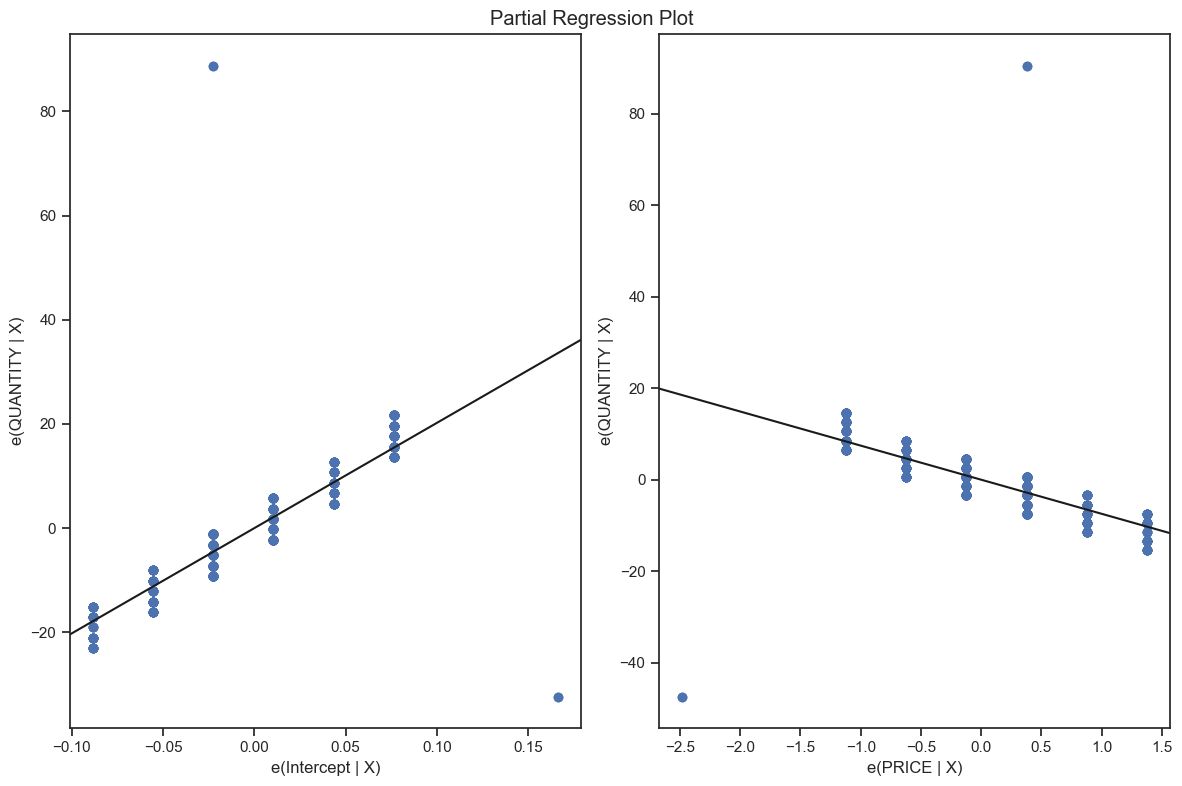

In [81]:
# This is for the combined data
burger_model = ols("QUANTITY ~ PRICE", data=burger_1070).fit()
print(burger_model.summary())
fig = plt.figure(figsize=(12,8))
fig = sm.graphics.plot_partregress_grid(burger_model, fig=fig)

,SELL_ID,SELL_CATEGORY,ITEM_NAME,CALENDAR_DATE,PRICE,QUANTITY,YEAR,HOLIDAY,IS_WEEKEND,IS_SCHOOLBREAK,AVERAGE_TEMPERATURE,IS_OUTDOOR
32,1070,0,BURGER,1/10/12,15.50,108,2012,No Holiday,0,0,24.8,0
33,2051,2,BURGER,1/10/12,12.73,40,2012,No Holiday,0,0,24.8,0
35,2052,2,BURGER,1/10/12,12.75,28,2012,No Holiday,0,0,24.8,0
37,2053,2,BURGER,1/10/12,12.60,58,2012,No Holiday,0,0,24.8,0
40,1070,0,BURGER,1/10/13,15.50,104,2013,No Holiday,0,0,28.4,0


(2832, 12)

,SELL_ID,SELL_CATEGORY,PRICE,QUANTITY,YEAR,IS_WEEKEND,IS_SCHOOLBREAK,AVERAGE_TEMPERATURE,IS_OUTDOOR
count,2832.000000,2832.000000,2832.000000,2832.000000,2832.000000,2832.0,2832.0,2832.000000,2832.000000
mean,1806.500000,1.500000,12.833347,49.759887,2013.223164,0.0,0.0,53.963559,0.879944
std,425.294155,0.866178,1.567778,27.679683,1.067645,0.0,0.0,18.813899,0.325085
min,1070.000000,0.000000,10.120000,16.000000,2012.000000,0.0,0.0,14.000000,0.000000
25%,1805.750000,1.500000,11.530000,28.000000,2012.000000,0.0,0.0,36.950000,1.000000
50%,2051.500000,2.000000,12.640000,42.000000,2013.000000,0.0,0.0,54.500000,1.000000
75%,2052.250000,2.000000,13.557500,74.000000,2014.000000,0.0,0.0,71.600000,1.000000
max,2053.000000,2.000000,16.500000,180.000000,2015.000000,0.0,0.0,87.800000,1.000000


<AxesSubplot:xlabel='PRICE', ylabel='QUANTITY'>

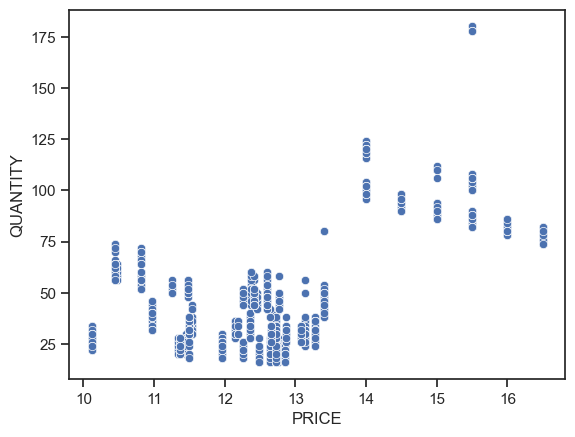

In [82]:
burger = bau_data[bau_data['ITEM_NAME'] == 'BURGER']
burger.head()
burger.shape
burger.describe()
sns.scatterplot(x = burger.PRICE, y = burger.QUANTITY )

<AxesSubplot:xlabel='PRICE', ylabel='QUANTITY'>

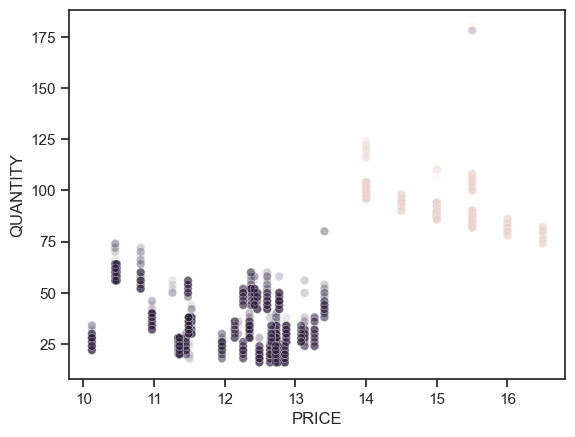

In [83]:
burger = bau_data[bau_data['ITEM_NAME'] == 'BURGER']
# print(burger)
# print(burger.describe())
sns.scatterplot(data = burger, x = burger.PRICE, y = burger.QUANTITY , hue = 'SELL_ID', legend=False, alpha = 0.1)

In [84]:
np.unique(bau_data.SELL_ID)

array([1070, 2051, 2052, 2053], dtype=int64)

In [85]:
np.unique(bau_data.SELL_CATEGORY)

array([0, 2], dtype=int64)

,SELL_ID,SELL_CATEGORY,ITEM_NAME,CALENDAR_DATE,PRICE,QUANTITY,YEAR,HOLIDAY,IS_WEEKEND,IS_SCHOOLBREAK,AVERAGE_TEMPERATURE,IS_OUTDOOR
32,1070,0,BURGER,1/10/12,15.5,108,2012,No Holiday,0,0,24.8,0
40,1070,0,BURGER,1/10/13,15.5,104,2013,No Holiday,0,0,28.4,0
48,1070,0,BURGER,1/10/14,15.5,102,2014,No Holiday,0,0,24.8,0
64,1070,0,BURGER,1/11/12,15.5,104,2012,No Holiday,0,0,21.2,0
72,1070,0,BURGER,1/11/13,15.5,102,2013,No Holiday,0,0,24.8,0


,SELL_ID,SELL_CATEGORY,PRICE,QUANTITY,YEAR,IS_WEEKEND,IS_SCHOOLBREAK,AVERAGE_TEMPERATURE,IS_OUTDOOR
count,708.0,708.0,708.000000,708.000000,708.000000,708.0,708.0,708.000000,708.000000
mean,1070.0,0.0,15.115508,91.742938,2013.223164,0.0,0.0,53.963559,0.879944
std,0.0,0.0,0.715501,10.795070,1.068211,0.0,0.0,18.823876,0.325257
min,1070.0,0.0,12.640000,42.000000,2012.000000,0.0,0.0,14.000000,0.000000
25%,1070.0,0.0,14.500000,86.000000,2012.000000,0.0,0.0,36.950000,1.000000
50%,1070.0,0.0,15.500000,90.000000,2013.000000,0.0,0.0,54.500000,1.000000
75%,1070.0,0.0,15.500000,98.000000,2014.000000,0.0,0.0,71.600000,1.000000
max,1070.0,0.0,16.500000,180.000000,2015.000000,0.0,0.0,87.800000,1.000000


<AxesSubplot:xlabel='PRICE', ylabel='QUANTITY'>

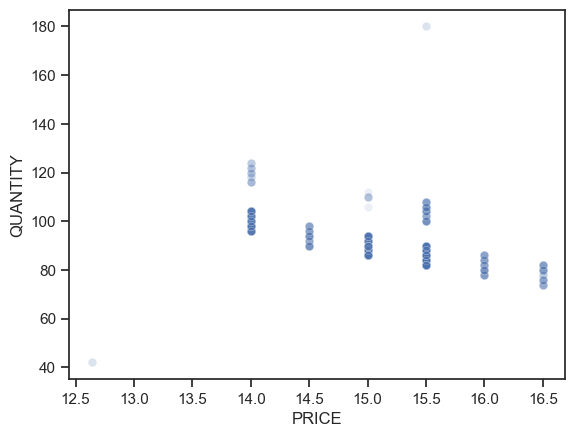

In [86]:
burger_1070 = bau_data[(bau_data['ITEM_NAME'] == 'BURGER') & (bau_data['SELL_ID'] == 1070)]

burger_1070.head()
burger_1070.describe()
sns.scatterplot(data = burger_1070, x = burger_1070.PRICE, y = burger_1070.QUANTITY, alpha = 0.1)

As you can see, the scatter plot is much cleaner. Although there does seem to be 2 separate trends

                            OLS Regression Results                            
Dep. Variable:               QUANTITY   R-squared:                       0.285
Model:                            OLS   Adj. R-squared:                  0.284
Method:                 Least Squares   F-statistic:                     281.1
Date:                Thu, 02 Mar 2023   Prob (F-statistic):           2.36e-53
Time:                        16:56:17   Log-Likelihood:                -2569.9
No. Observations:                 708   AIC:                             5144.
Df Residuals:                     706   BIC:                             5153.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    213.4369      7.267     29.371      0.0

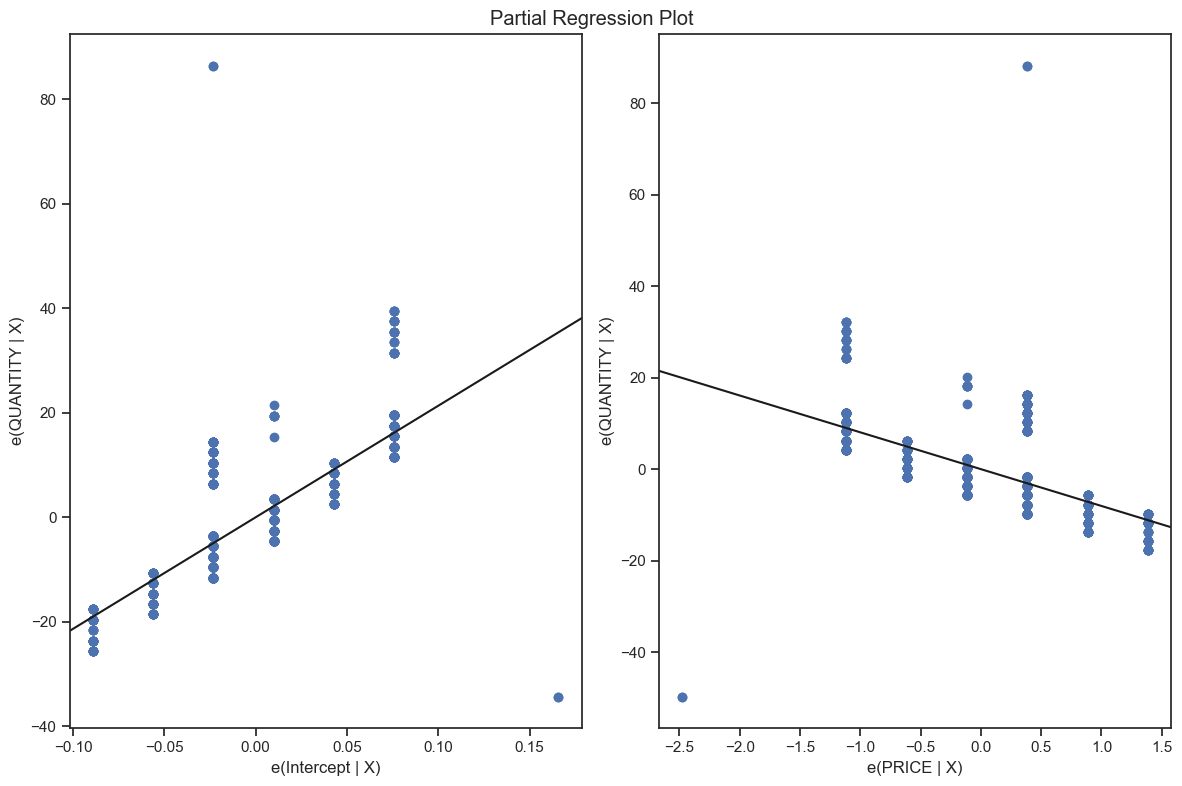

In [87]:
burger_model = ols("QUANTITY ~ PRICE", data=burger_1070).fit()
print(burger_model.summary())
fig = plt.figure(figsize=(12,8))
fig = sm.graphics.plot_partregress_grid(burger_model, fig=fig)

Let's look at the bau data again to see if there is anything els ein the data we can use to further refine our model.

In [88]:
bau_data.head(10)

,SELL_ID,SELL_CATEGORY,ITEM_NAME,CALENDAR_DATE,PRICE,QUANTITY,YEAR,HOLIDAY,IS_WEEKEND,IS_SCHOOLBREAK,AVERAGE_TEMPERATURE,IS_OUTDOOR
32,1070,0,BURGER,1/10/12,15.50,108,2012,No Holiday,0,0,24.8,0
33,2051,2,BURGER,1/10/12,12.73,40,2012,No Holiday,0,0,24.8,0
34,2051,2,COKE,1/10/12,12.73,40,2012,No Holiday,0,0,24.8,0
35,2052,2,BURGER,1/10/12,12.75,28,2012,No Holiday,0,0,24.8,0
36,2052,2,LEMONADE,1/10/12,12.75,28,2012,No Holiday,0,0,24.8,0
37,2053,2,BURGER,1/10/12,12.60,58,2012,No Holiday,0,0,24.8,0
38,2053,2,COFFEE,1/10/12,12.60,58,2012,No Holiday,0,0,24.8,0
39,2053,2,COKE,1/10/12,12.60,58,2012,No Holiday,0,0,24.8,0
40,1070,0,BURGER,1/10/13,15.50,104,2013,No Holiday,0,0,28.4,0
41,2051,2,BURGER,1/10/13,13.13,32,2013,No Holiday,0,0,28.4,0


In [89]:
bau2_data = combined_data[(combined_data['HOLIDAY']=='No Holiday') & (combined_data['IS_SCHOOLBREAK']==0) & (combined_data['IS_WEEKEND']==0) & (combined_data['IS_OUTDOOR']==1)]

,SELL_ID,SELL_CATEGORY,ITEM_NAME,CALENDAR_DATE,PRICE,QUANTITY,YEAR,HOLIDAY,IS_WEEKEND,IS_SCHOOLBREAK,AVERAGE_TEMPERATURE,IS_OUTDOOR
176,1070,0,BURGER,1/14/14,15.5,86,2014,No Holiday,0,0,28.4,1
216,1070,0,BURGER,1/15/15,14.0,104,2015,No Holiday,0,0,32.0,1
248,1070,0,BURGER,1/16/15,14.0,100,2015,No Holiday,0,0,32.0,1
376,1070,0,BURGER,1/2/15,14.0,102,2015,No Holiday,0,0,37.4,1
608,1070,0,BURGER,1/27/12,15.5,86,2012,No Holiday,0,0,32.0,1


,SELL_ID,SELL_CATEGORY,PRICE,QUANTITY,YEAR,IS_WEEKEND,IS_SCHOOLBREAK,AVERAGE_TEMPERATURE,IS_OUTDOOR
count,623.0,623.0,623.000000,623.000000,623.000000,623.0,623.0,623.00000,623.0
mean,1070.0,0.0,15.124045,89.431782,2013.239165,0.0,0.0,57.69695,1.0
std,0.0,0.0,0.722906,8.956024,1.087317,0.0,0.0,16.81881,0.0
min,1070.0,0.0,12.640000,42.000000,2012.000000,0.0,0.0,26.60000,1.0
25%,1070.0,0.0,14.500000,84.000000,2012.000000,0.0,0.0,41.00000,1.0
50%,1070.0,0.0,15.000000,88.000000,2013.000000,0.0,0.0,59.00000,1.0
75%,1070.0,0.0,15.500000,94.000000,2014.000000,0.0,0.0,73.40000,1.0
max,1070.0,0.0,16.500000,180.000000,2015.000000,0.0,0.0,87.80000,1.0


<AxesSubplot:xlabel='PRICE', ylabel='QUANTITY'>

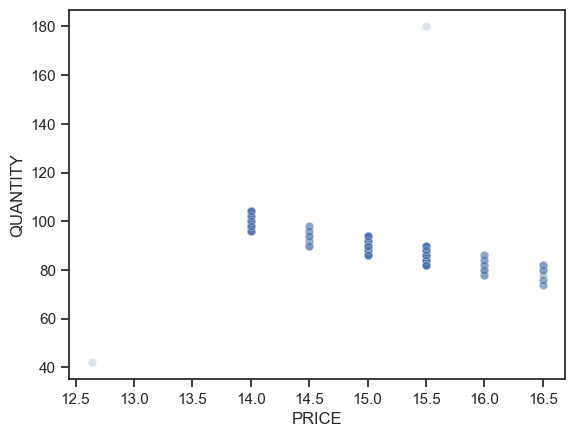

In [90]:
burger_1070 = bau2_data[(bau2_data['ITEM_NAME'] == 'BURGER') & (bau2_data['SELL_ID'] == 1070)]

burger_1070.head()
burger_1070.describe()
sns.scatterplot(data = burger_1070, x = burger_1070.PRICE, y = burger_1070.QUANTITY, alpha = 0.1)

                            OLS Regression Results                            
Dep. Variable:               QUANTITY   R-squared:                       0.362
Model:                            OLS   Adj. R-squared:                  0.361
Method:                 Least Squares   F-statistic:                     352.6
Date:                Thu, 02 Mar 2023   Prob (F-statistic):           1.21e-62
Time:                        16:56:18   Log-Likelihood:                -2109.2
No. Observations:                 623   AIC:                             4222.
Df Residuals:                     621   BIC:                             4231.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    202.1935      6.012     33.633      0.0

<Figure size 1200x800 with 0 Axes>

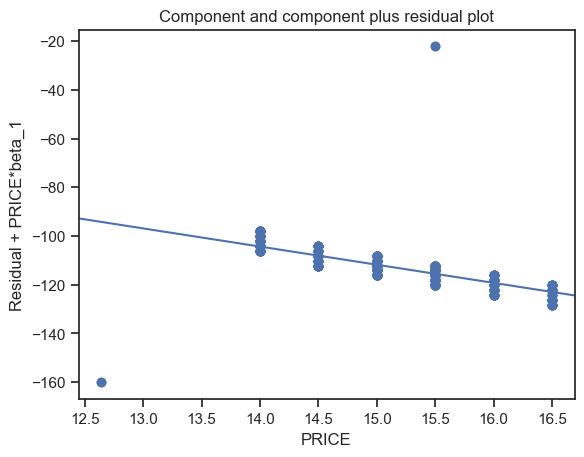

In [91]:
burger_model = ols("QUANTITY ~ PRICE", data=burger_1070).fit()
print(burger_model.summary())
fig = plt.figure(figsize=(12,8))
fig = sm.graphics.plot_ccpr(burger_model, "PRICE")

eval_env: 1


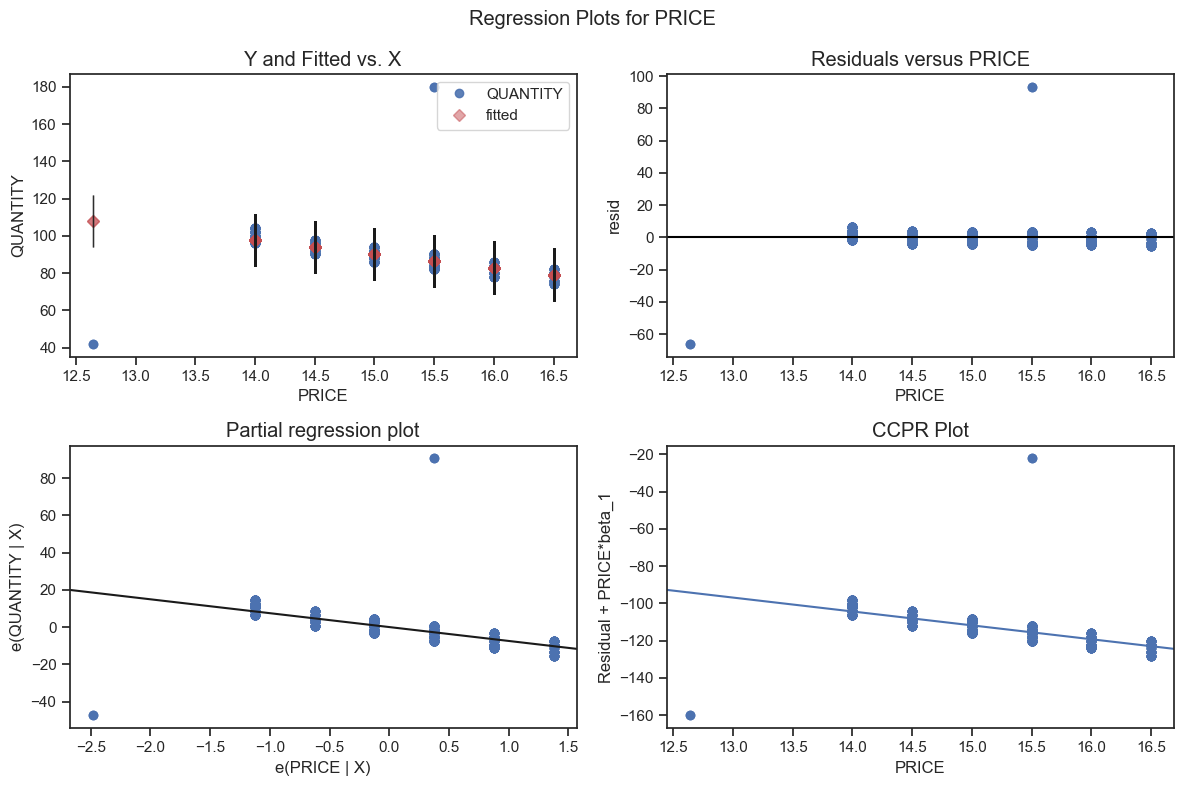

In [92]:
fig = plt.figure(figsize=(12,8))
fig = sm.graphics.plot_regress_exog(burger_model, "PRICE", fig=fig)

,SELL_ID,SELL_CATEGORY,ITEM_NAME,CALENDAR_DATE,PRICE,QUANTITY,YEAR,HOLIDAY,IS_WEEKEND,IS_SCHOOLBREAK,AVERAGE_TEMPERATURE,IS_OUTDOOR
1,2051,2,BURGER,1/1/12,12.73,22,2012,New Year,1,0,24.8,0
9,2051,2,BURGER,1/1/13,13.13,22,2013,New Year,0,0,30.2,1
17,2051,2,BURGER,1/1/14,13.27,22,2014,New Year,0,0,19.4,0
25,2051,2,BURGER,1/1/15,11.53,24,2015,New Year,0,0,37.4,1
33,2051,2,BURGER,1/10/12,12.73,40,2012,No Holiday,0,0,24.8,0


,SELL_ID,SELL_CATEGORY,PRICE,QUANTITY,YEAR,IS_WEEKEND,IS_SCHOOLBREAK,AVERAGE_TEMPERATURE,IS_OUTDOOR
count,1351.0,1351.0,1351.000000,1351.000000,1351.000000,1351.000000,1351.000000,1351.000000,1351.000000
mean,2051.0,2.0,12.383368,29.304219,2013.374537,0.284974,0.204293,56.295337,0.862324
std,0.0,0.0,0.730868,8.200902,1.072375,0.451569,0.403333,20.228796,0.344687
min,2051.0,2.0,10.970000,12.000000,2012.000000,0.000000,0.000000,14.000000,0.000000
25%,2051.0,2.0,11.530000,24.000000,2012.000000,0.000000,0.000000,35.600000,1.000000
50%,2051.0,2.0,12.660000,30.000000,2013.000000,0.000000,0.000000,60.800000,1.000000
75%,2051.0,2.0,13.080000,34.000000,2014.000000,1.000000,0.000000,75.200000,1.000000
max,2051.0,2.0,15.500000,178.000000,2015.000000,1.000000,1.000000,87.800000,1.000000


<AxesSubplot:xlabel='PRICE', ylabel='QUANTITY'>

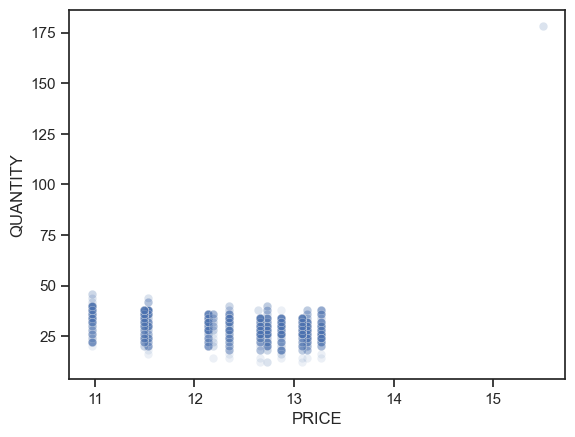

In [93]:
burger_2051 = combined_data[(combined_data['ITEM_NAME'] == 'BURGER') & (combined_data['SELL_ID'] == 2051)]

burger_2051.head()
burger_2051.describe()
sns.scatterplot(data = burger_2051, x = burger_2051.PRICE, y = burger_2051.QUANTITY, alpha = 0.1)

                            OLS Regression Results                            
Dep. Variable:               QUANTITY   R-squared:                       0.012
Model:                            OLS   Adj. R-squared:                  0.011
Method:                 Least Squares   F-statistic:                     16.69
Date:                Thu, 02 Mar 2023   Prob (F-statistic):           4.65e-05
Time:                        16:56:20   Log-Likelihood:                -4751.0
No. Observations:                1351   AIC:                             9506.
Df Residuals:                    1349   BIC:                             9516.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     44.6664      3.767     11.859      0.0

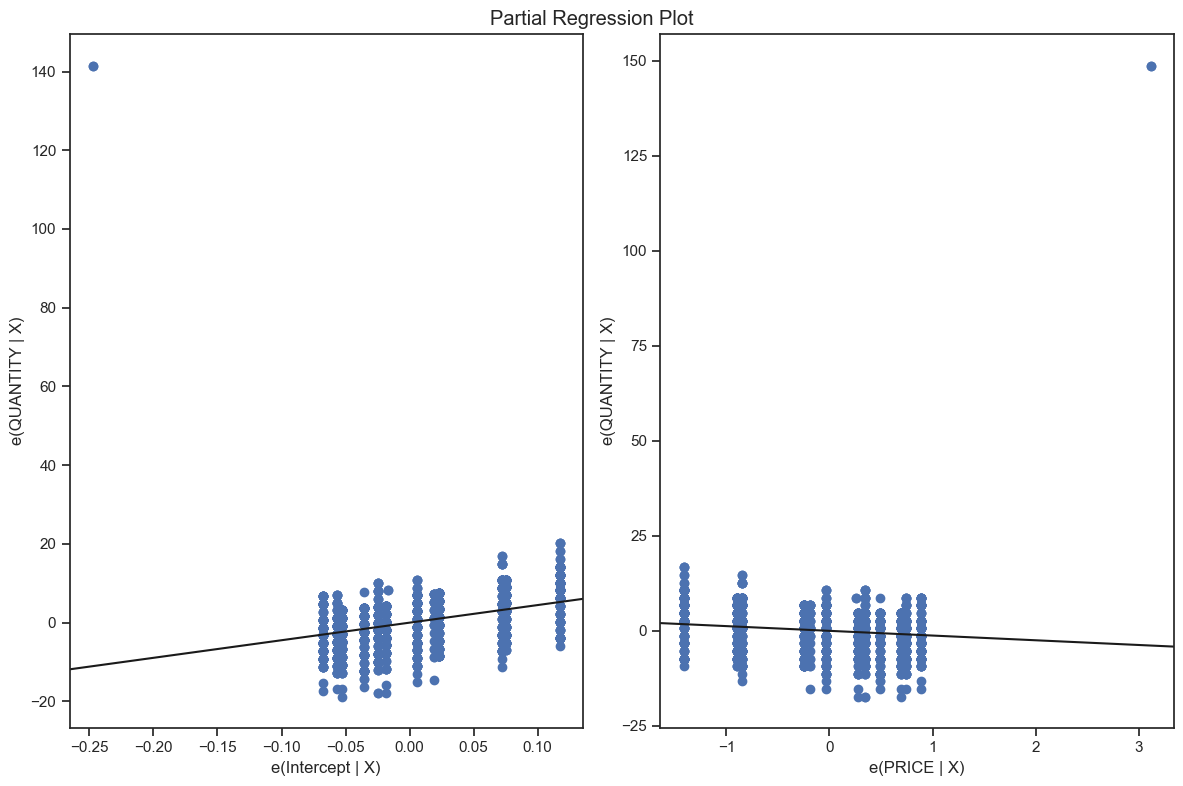

In [94]:
burger_model = ols("QUANTITY ~ PRICE", data=burger_2051).fit()
print(burger_model.summary())
fig = plt.figure(figsize=(12,8))
fig = sm.graphics.plot_partregress_grid(burger_model, fig=fig)

,SELL_ID,SELL_CATEGORY,ITEM_NAME,CALENDAR_DATE,PRICE,QUANTITY,YEAR,HOLIDAY,IS_WEEKEND,IS_SCHOOLBREAK,AVERAGE_TEMPERATURE,IS_OUTDOOR
2,2051,2,COKE,1/1/12,12.73,22,2012,New Year,1,0,24.8,0
7,2053,2,COKE,1/1/12,12.60,30,2012,New Year,1,0,24.8,0
10,2051,2,COKE,1/1/13,13.13,22,2013,New Year,0,0,30.2,1
15,2053,2,COKE,1/1/13,13.41,30,2013,New Year,0,0,30.2,1
18,2051,2,COKE,1/1/14,13.27,22,2014,New Year,0,0,19.4,0


(2702, 12)

,SELL_ID,SELL_CATEGORY,PRICE,QUANTITY,YEAR,IS_WEEKEND,IS_SCHOOLBREAK,AVERAGE_TEMPERATURE,IS_OUTDOOR
count,2702.000000,2702.0,2702.000000,2702.000000,2702.000000,2702.000000,2702.000000,2702.000000,2702.000000
mean,2052.000000,2.0,12.162372,37.754996,2013.374537,0.284974,0.204293,56.295337,0.862324
std,1.000185,0.0,0.873843,12.481661,1.072177,0.451486,0.403259,20.225051,0.344623
min,2051.000000,2.0,10.450000,12.000000,2012.000000,0.000000,0.000000,14.000000,0.000000
25%,2051.000000,2.0,11.490000,28.000000,2012.000000,0.000000,0.000000,35.600000,1.000000
50%,2052.000000,2.0,12.370000,36.000000,2013.000000,0.000000,0.000000,60.800000,1.000000
75%,2053.000000,2.0,12.770000,46.000000,2014.000000,1.000000,0.000000,75.200000,1.000000
max,2053.000000,2.0,15.500000,178.000000,2015.000000,1.000000,1.000000,87.800000,1.000000


<AxesSubplot:xlabel='PRICE', ylabel='QUANTITY'>

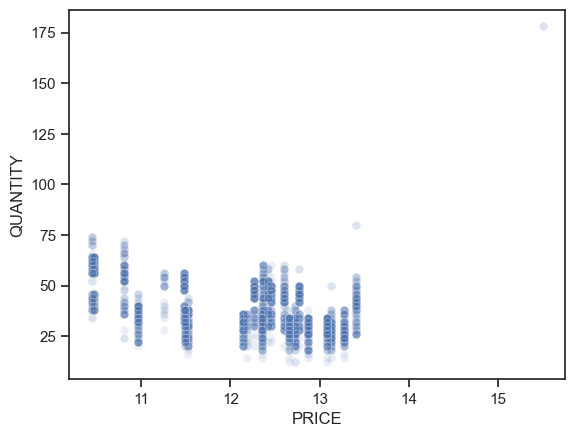

In [95]:
coke = combined_data[combined_data['ITEM_NAME'] == 'COKE']
coke.head()
coke.shape
coke.describe()
sns.scatterplot(x = coke.PRICE, y = coke.QUANTITY , alpha = 0.1)

                            OLS Regression Results                            
Dep. Variable:               QUANTITY   R-squared:                       0.170
Model:                            OLS   Adj. R-squared:                  0.169
Method:                 Least Squares   F-statistic:                     551.1
Date:                Thu, 02 Mar 2023   Prob (F-statistic):          4.61e-111
Time:                        16:56:20   Log-Likelihood:                -10403.
No. Observations:                2702   AIC:                         2.081e+04
Df Residuals:                    2700   BIC:                         2.082e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    109.2821      3.055     35.776      0.0

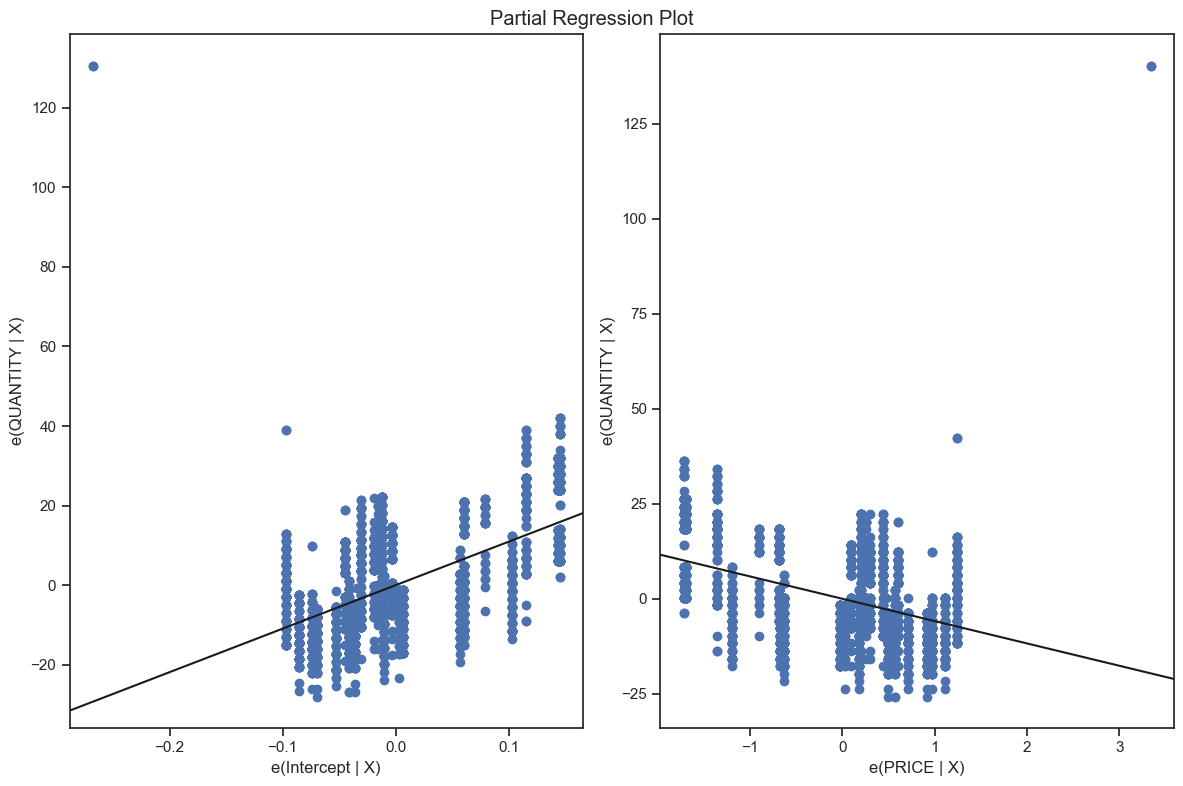

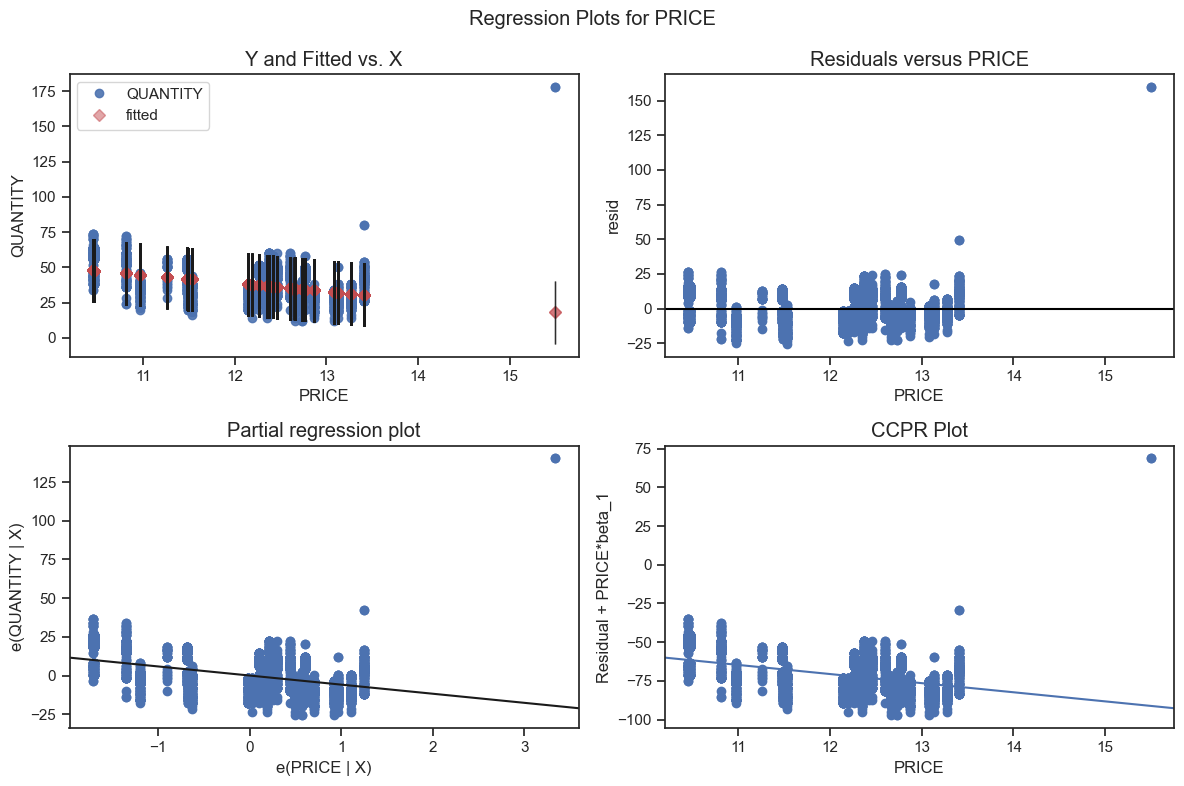

In [96]:
coke_model = ols("QUANTITY ~ PRICE", data=coke).fit()
print(coke_model.summary())
fig = plt.figure(figsize=(12,8))
fig = sm.graphics.plot_partregress_grid(coke_model, fig=fig)
fig = plt.figure(figsize=(12,8))
fig = sm.graphics.plot_regress_exog(coke_model, 'PRICE', fig=fig)

In [97]:
%whos

Variable             Type                        Data/Info
----------------------------------------------------------
ARIMA                type                        <class 'statsmodels.tsa.arima_model.ARIMA'>
InteractiveShell     MetaHasTraits               <class 'IPython.core.inte<...>eshell.InteractiveShell'>
b                    Series                      SELL_ID  SELL_CATEGORY  I<...>e: QUANTITY, dtype: int64
bau2_data            DataFrame                          SELL_ID  SELL_CATE<...>       71.6           1  
bau_data             DataFrame                          SELL_ID  SELL_CATE<...>       71.6           1  
burger               DataFrame                          SELL_ID  SELL_CATE<...>       71.6           1  
burger_1070          DataFrame                          SELL_ID  SELL_CATE<...>       71.6           1  
burger_2051          DataFrame                          SELL_ID  SELL_CATE<...> 1  \n10801           1  
burger_model         RegressionResultsWrapper    <stat

,SELL_ID,SELL_CATEGORY,ITEM_NAME,CALENDAR_DATE,PRICE,QUANTITY,YEAR,HOLIDAY,IS_WEEKEND,IS_SCHOOLBREAK,AVERAGE_TEMPERATURE,IS_OUTDOOR
6,2053,2,COFFEE,1/1/12,12.60,30,2012,New Year,1,0,24.8,0
14,2053,2,COFFEE,1/1/13,13.41,30,2013,New Year,0,0,30.2,1
22,2053,2,COFFEE,1/1/14,12.37,44,2014,New Year,0,0,19.4,0
30,2053,2,COFFEE,1/1/15,10.81,36,2015,New Year,0,0,37.4,1
38,2053,2,COFFEE,1/10/12,12.60,58,2012,No Holiday,0,0,24.8,0


(1351, 12)

,SELL_ID,SELL_CATEGORY,PRICE,QUANTITY,YEAR,IS_WEEKEND,IS_SCHOOLBREAK,AVERAGE_TEMPERATURE,IS_OUTDOOR
count,1351.0,1351.0,1351.000000,1351.000000,1351.000000,1351.000000,1351.000000,1351.000000,1351.000000
mean,2053.0,2.0,11.941377,46.205774,2013.374537,0.284974,0.204293,56.295337,0.862324
std,0.0,0.0,0.946494,10.075081,1.072375,0.451569,0.403333,20.228796,0.344687
min,2053.0,2.0,10.450000,20.000000,2012.000000,0.000000,0.000000,14.000000,0.000000
25%,2053.0,2.0,10.810000,38.000000,2012.000000,0.000000,0.000000,35.600000,1.000000
50%,2053.0,2.0,12.370000,46.000000,2013.000000,0.000000,0.000000,60.800000,1.000000
75%,2053.0,2.0,12.600000,52.000000,2014.000000,1.000000,0.000000,75.200000,1.000000
max,2053.0,2.0,13.410000,80.000000,2015.000000,1.000000,1.000000,87.800000,1.000000


<AxesSubplot:xlabel='PRICE', ylabel='QUANTITY'>

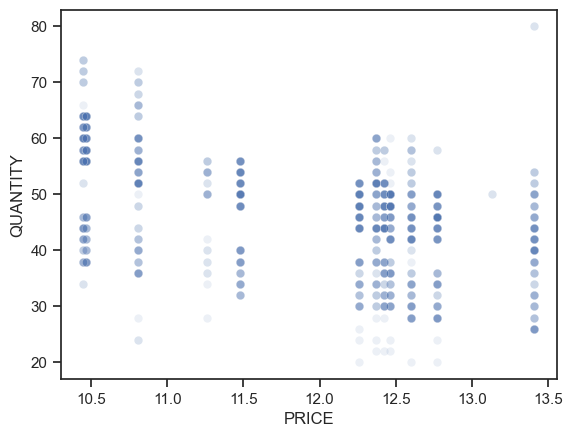

In [98]:
df = combined_data[combined_data['ITEM_NAME'] == 'COFFEE']
df.head()
df.shape
df.describe()
sns.scatterplot(x = df.PRICE, y = df.QUANTITY , alpha = 0.1)

                            OLS Regression Results                            
Dep. Variable:               QUANTITY   R-squared:                       0.231
Model:                            OLS   Adj. R-squared:                  0.231
Method:                 Least Squares   F-statistic:                     405.5
Date:                Thu, 02 Mar 2023   Prob (F-statistic):           4.71e-79
Time:                        16:56:27   Log-Likelihood:                -4859.9
No. Observations:                1351   AIC:                             9724.
Df Residuals:                    1349   BIC:                             9734.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    107.3120      3.044     35.251      0.0

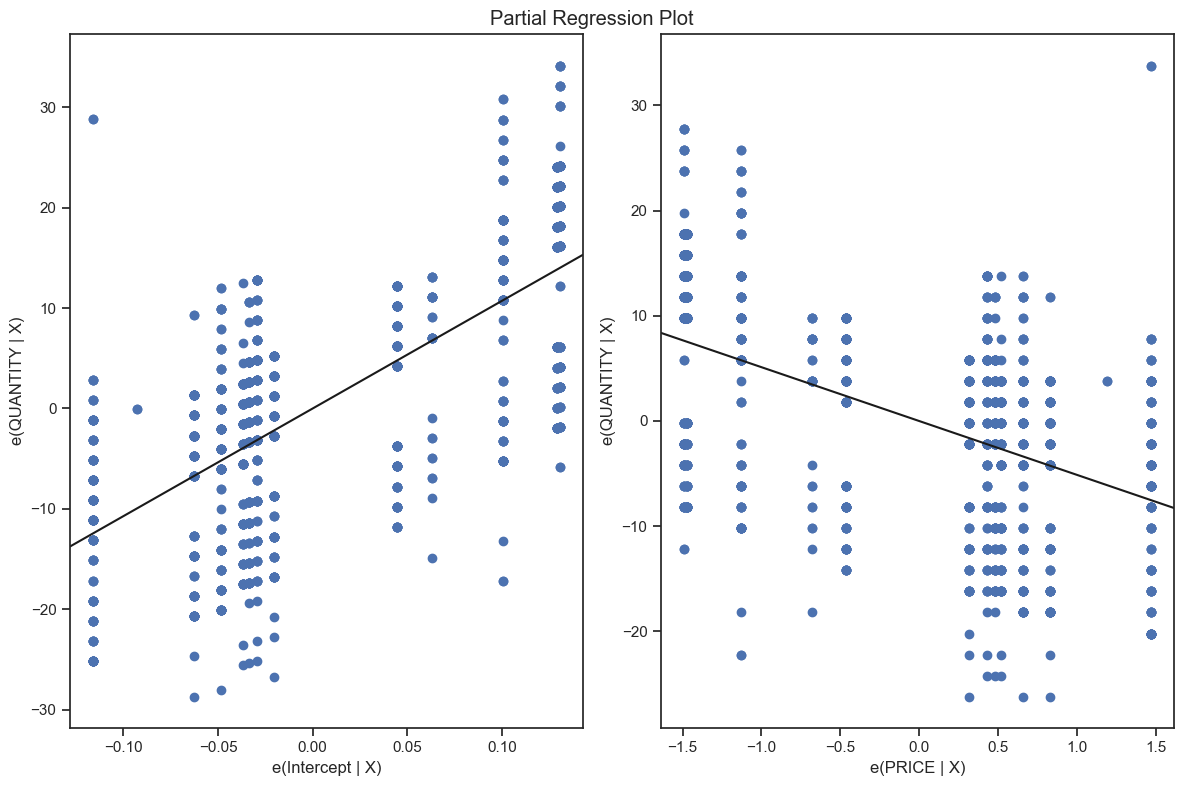

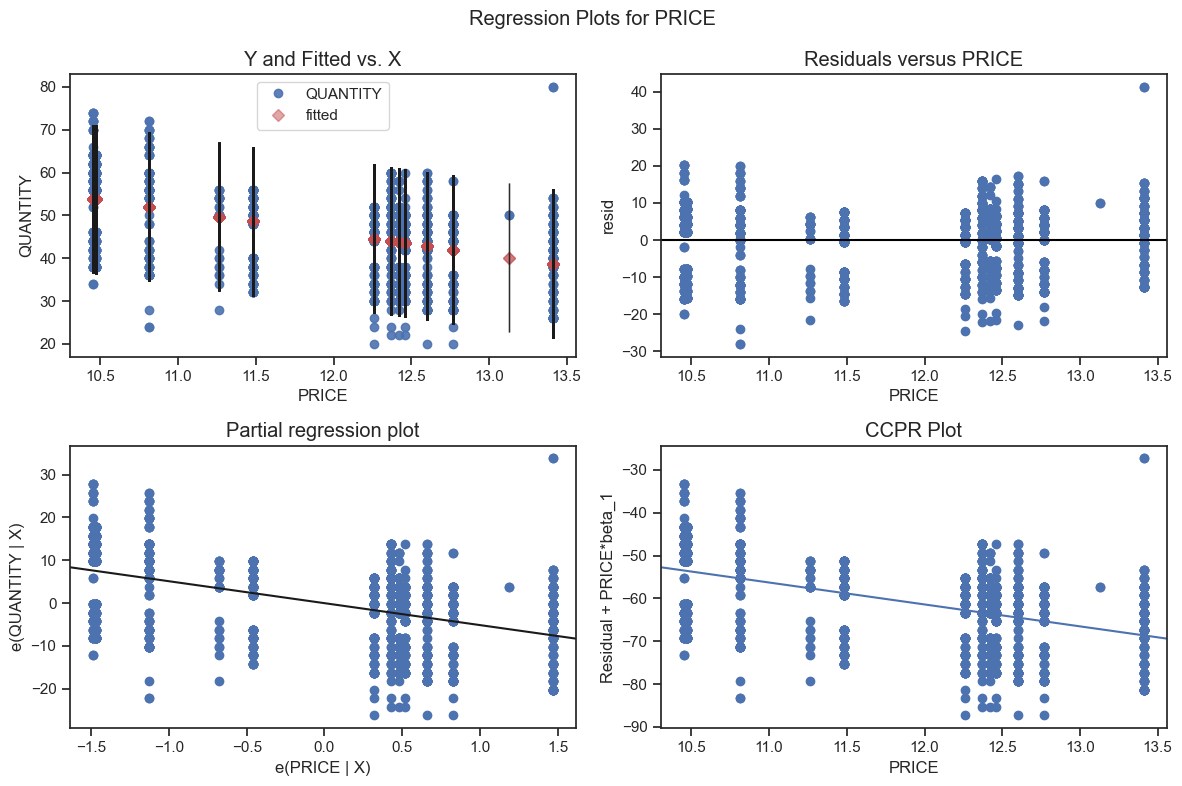

In [99]:
model = ols("QUANTITY ~ PRICE", data=df).fit()
print(model.summary())
fig = plt.figure(figsize=(12,8))
fig = sm.graphics.plot_partregress_grid(model, fig=fig)
fig = plt.figure(figsize=(12,8))
fig = sm.graphics.plot_regress_exog(model, 'PRICE', fig=fig)

,SELL_ID,SELL_CATEGORY,ITEM_NAME,CALENDAR_DATE,PRICE,QUANTITY,YEAR,HOLIDAY,IS_WEEKEND,IS_SCHOOLBREAK,AVERAGE_TEMPERATURE,IS_OUTDOOR
4,2052,2,LEMONADE,1/1/12,12.75,18,2012,New Year,1,0,24.8,0
12,2052,2,LEMONADE,1/1/13,12.64,16,2013,New Year,0,0,30.2,1
20,2052,2,LEMONADE,1/1/14,11.96,20,2014,New Year,0,0,19.4,0
28,2052,2,LEMONADE,1/1/15,11.45,20,2015,New Year,0,0,37.4,1
36,2052,2,LEMONADE,1/10/12,12.75,28,2012,No Holiday,0,0,24.8,0


(1351, 12)

,SELL_ID,SELL_CATEGORY,PRICE,QUANTITY,YEAR,IS_WEEKEND,IS_SCHOOLBREAK,AVERAGE_TEMPERATURE,IS_OUTDOOR
count,1351.0,1351.0,1351.000000,1351.000000,1351.000000,1351.000000,1351.000000,1351.000000,1351.000000
mean,2052.0,2.0,11.986751,20.792006,2013.374537,0.284974,0.204293,56.295337,0.862324
std,0.0,0.0,0.806112,5.215685,1.072375,0.451569,0.403333,20.228796,0.344687
min,2052.0,2.0,10.120000,8.000000,2012.000000,0.000000,0.000000,14.000000,0.000000
25%,2052.0,2.0,11.360000,18.000000,2012.000000,0.000000,0.000000,35.600000,1.000000
50%,2052.0,2.0,12.260000,20.000000,2013.000000,0.000000,0.000000,60.800000,1.000000
75%,2052.0,2.0,12.720000,24.000000,2014.000000,1.000000,0.000000,75.200000,1.000000
max,2052.0,2.0,13.410000,80.000000,2015.000000,1.000000,1.000000,87.800000,1.000000


<AxesSubplot:xlabel='PRICE', ylabel='QUANTITY'>

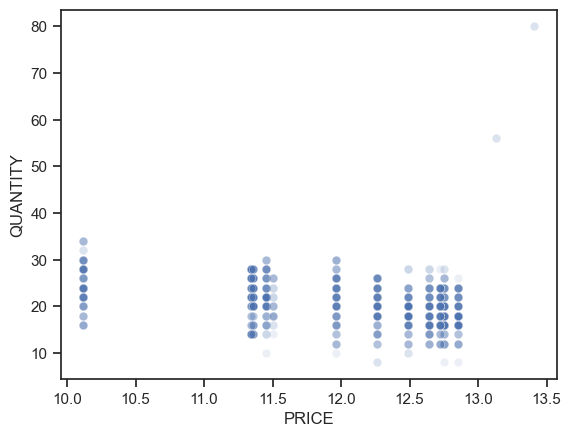

In [100]:
df = combined_data[combined_data['ITEM_NAME'] == 'LEMONADE']
df.head()
df.shape
df.describe()
sns.scatterplot(x = df.PRICE, y = df.QUANTITY , alpha = 0.1)

                            OLS Regression Results                            
Dep. Variable:               QUANTITY   R-squared:                       0.101
Model:                            OLS   Adj. R-squared:                  0.100
Method:                 Least Squares   F-statistic:                     151.5
Date:                Thu, 02 Mar 2023   Prob (F-statistic):           4.46e-33
Time:                        16:56:29   Log-Likelihood:                -4076.0
No. Observations:                1351   AIC:                             8156.
Df Residuals:                    1349   BIC:                             8166.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     45.4372      2.007     22.643      0.0

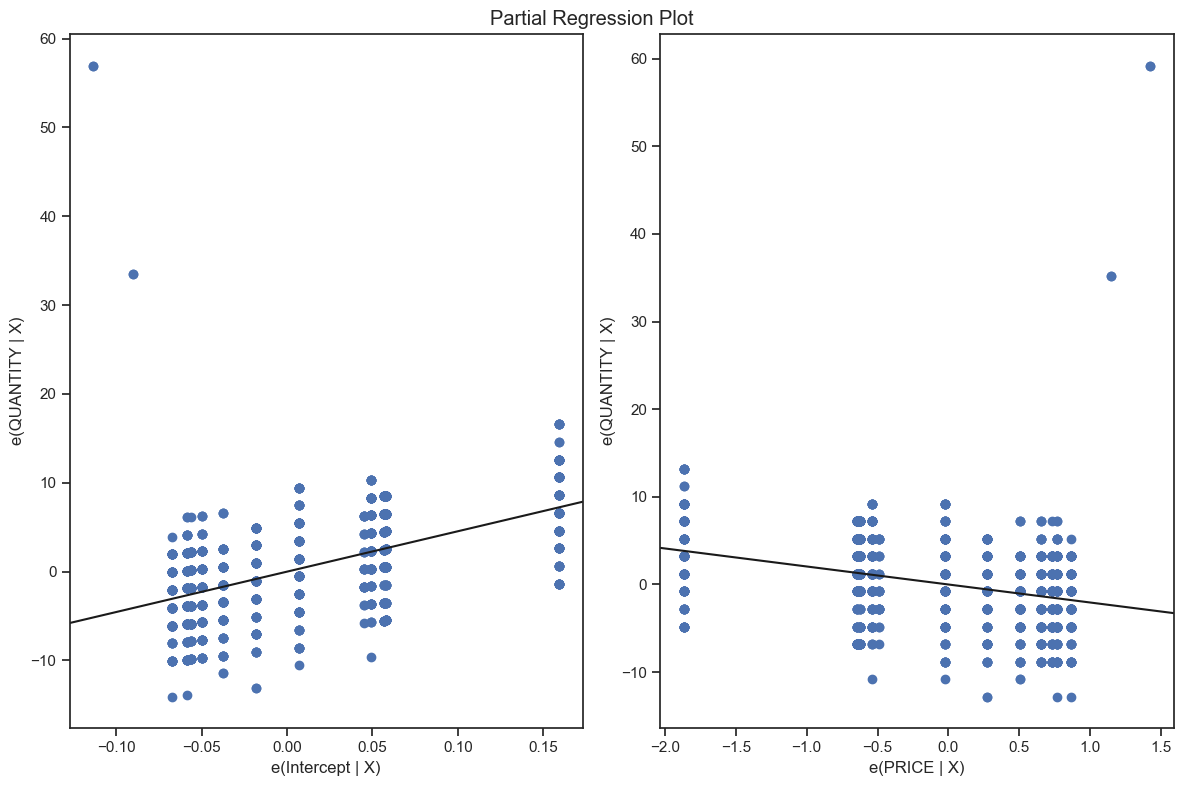

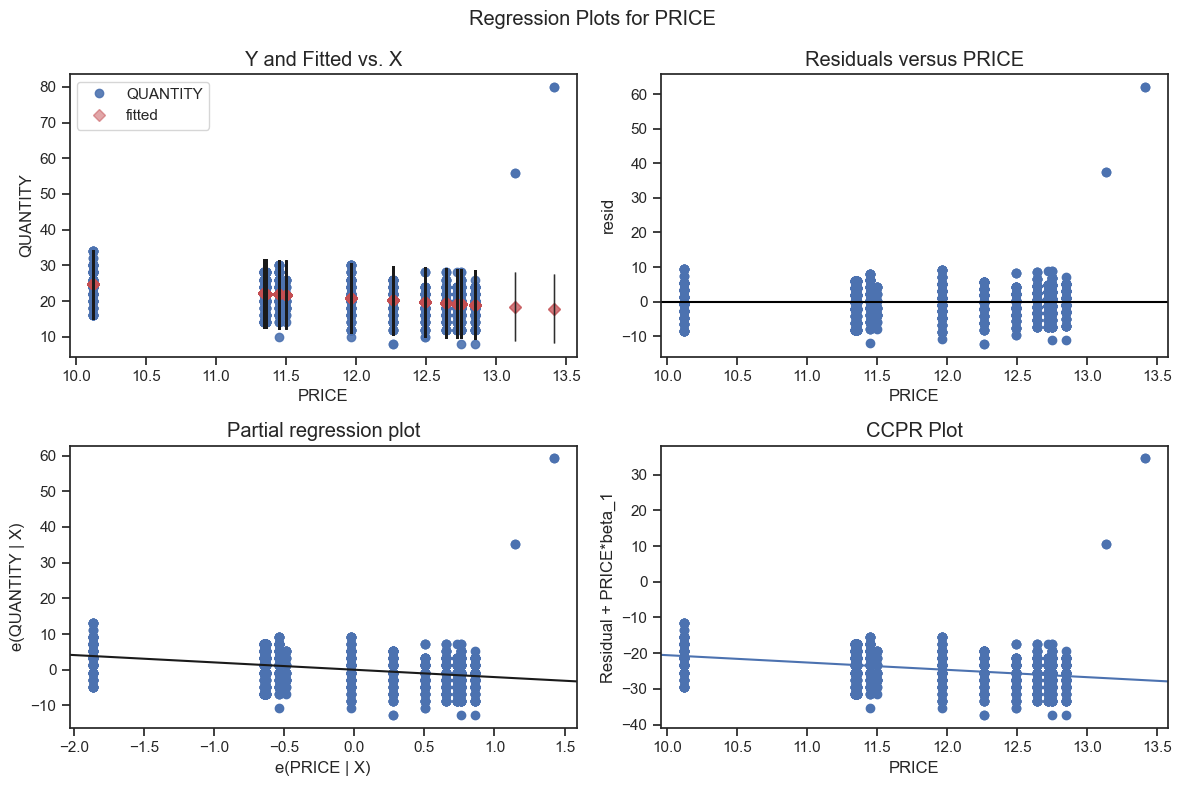

In [101]:
model = ols("QUANTITY ~ PRICE", data=df).fit()
print(model.summary())
fig = plt.figure(figsize=(12,8))
fig = sm.graphics.plot_partregress_grid(model, fig=fig)
fig = plt.figure(figsize=(12,8))
fig = sm.graphics.plot_regress_exog(model, 'PRICE', fig=fig)

In [115]:
elasticities = {}

#  OOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOO

In [116]:
def create_model_and_find_elasticity(data):
    model = ols("QUANTITY ~ PRICE", data).fit()
    price_elasticity = model.params[1]
    print("Price elasticity of the product: " + str(price_elasticity))
    print(model.summary())
    fig = plt.figure(figsize=(12,8))
    fig = sm.graphics.plot_partregress_grid(model, fig=fig)
    return price_elasticity, model

Price elasticity of the product: -7.45579348482817
                            OLS Regression Results                            
Dep. Variable:               QUANTITY   R-squared:                       0.362
Model:                            OLS   Adj. R-squared:                  0.361
Method:                 Least Squares   F-statistic:                     352.6
Date:                Thu, 02 Mar 2023   Prob (F-statistic):           1.21e-62
Time:                        16:58:53   Log-Likelihood:                -2109.2
No. Observations:                 623   AIC:                             4222.
Df Residuals:                     621   BIC:                             4231.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
I

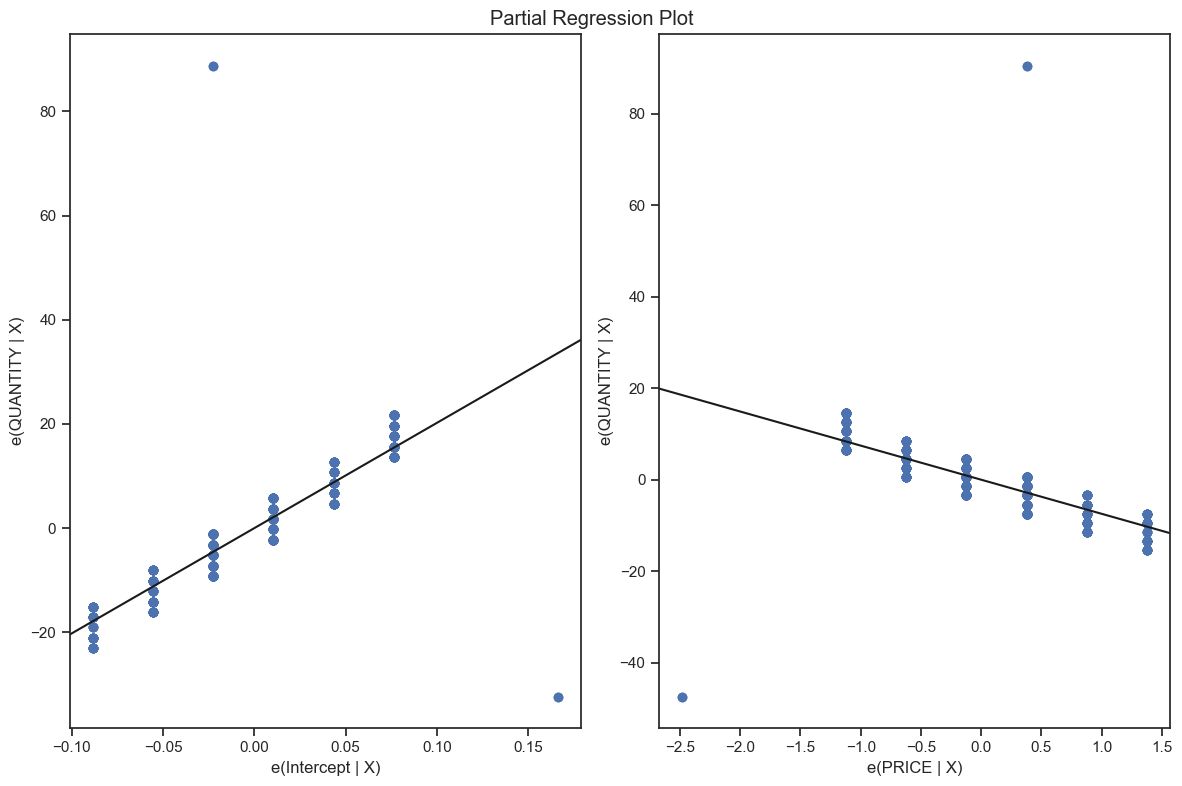

In [117]:
price_elasticity, model_burger_1070 = create_model_and_find_elasticity(burger_1070)
elasticities['burger_1070'] = price_elasticity

Price elasticity of the product: -0.6947406688026629
                            OLS Regression Results                            
Dep. Variable:               QUANTITY   R-squared:                       0.003
Model:                            OLS   Adj. R-squared:                  0.002
Method:                 Least Squares   F-statistic:                     2.035
Date:                Thu, 02 Mar 2023   Prob (F-statistic):              0.154
Time:                        16:58:54   Log-Likelihood:                -2261.7
No. Observations:                 623   AIC:                             4527.
Df Residuals:                     621   BIC:                             4536.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------

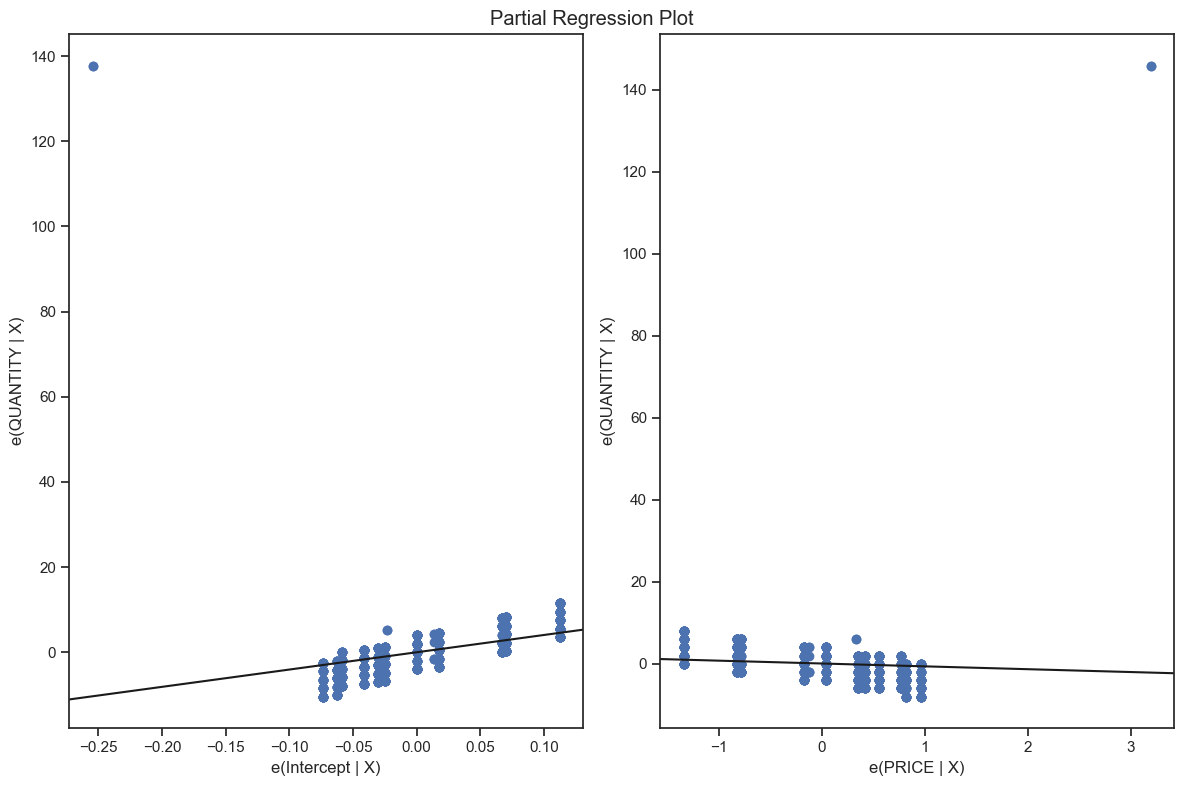

In [118]:
burger2051_data = bau2_data[(bau2_data['ITEM_NAME'] == "BURGER") & (bau2_data['SELL_ID'] == 2051)]
elasticities['burger_2051'], model_burger_2051 = create_model_and_find_elasticity(burger2051_data)

Price elasticity of the product: -2.0383181147068705
                            OLS Regression Results                            
Dep. Variable:               QUANTITY   R-squared:                       0.109
Model:                            OLS   Adj. R-squared:                  0.108
Method:                 Least Squares   F-statistic:                     75.93
Date:                Thu, 02 Mar 2023   Prob (F-statistic):           2.66e-17
Time:                        16:58:56   Log-Likelihood:                -1876.1
No. Observations:                 623   AIC:                             3756.
Df Residuals:                     621   BIC:                             3765.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------

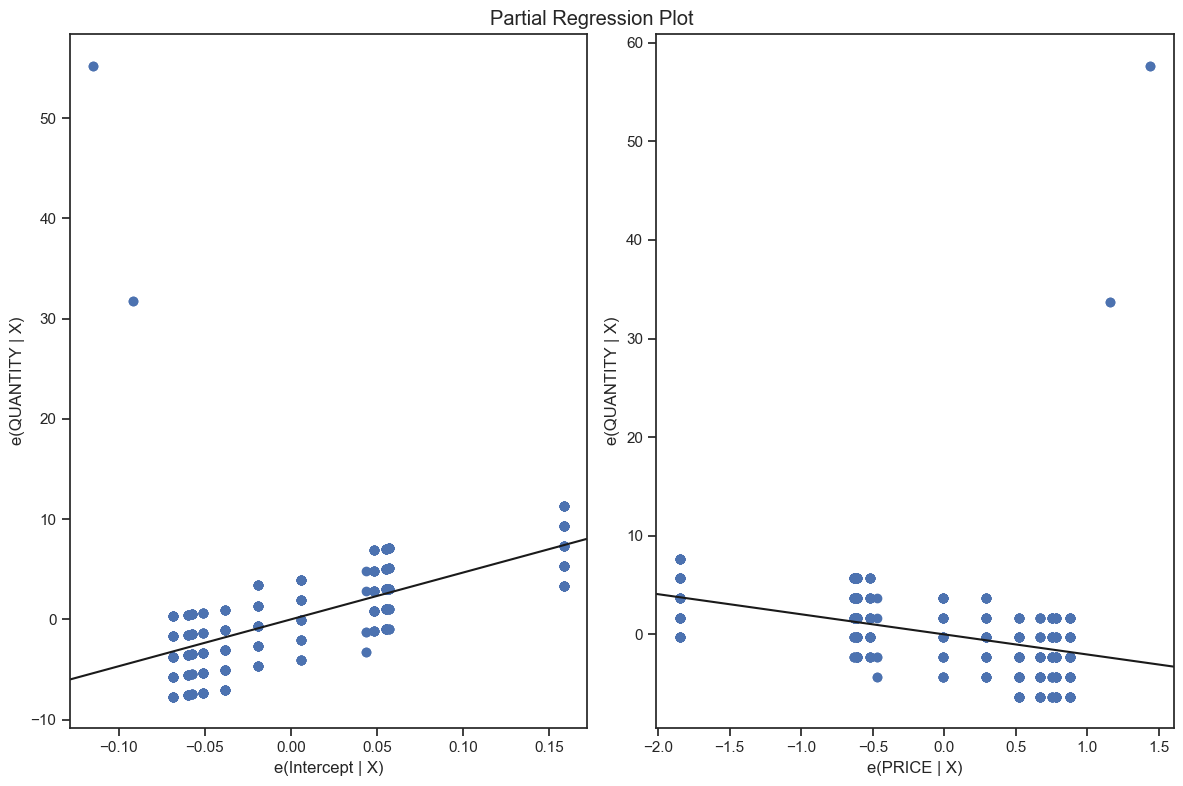

In [119]:
burger2052_data = bau2_data[(bau2_data['ITEM_NAME'] == "BURGER") & (bau2_data['SELL_ID'] == 2052)]
elasticities['burger_2052'], model_burger_2052 = create_model_and_find_elasticity(burger2052_data)

Price elasticity of the product: -5.7867091221732645
                            OLS Regression Results                            
Dep. Variable:               QUANTITY   R-squared:                       0.710
Model:                            OLS   Adj. R-squared:                  0.710
Method:                 Least Squares   F-statistic:                     1523.
Date:                Thu, 02 Mar 2023   Prob (F-statistic):          3.13e-169
Time:                        16:58:57   Log-Likelihood:                -1690.8
No. Observations:                 623   AIC:                             3386.
Df Residuals:                     621   BIC:                             3394.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------

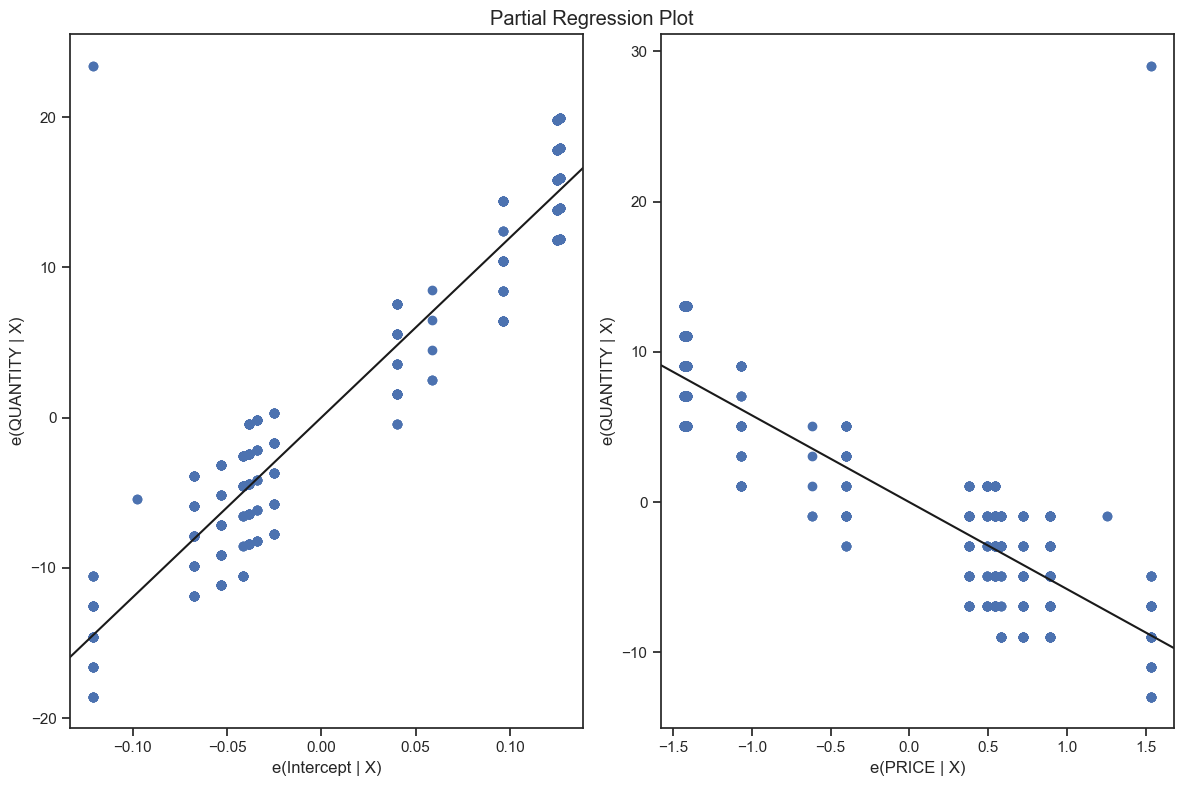

In [120]:
burger2053_data = bau2_data[(bau2_data['ITEM_NAME'] == "BURGER") & (bau2_data['SELL_ID'] == 2053)]
elasticities['burger_2053'], model_burger_2053 = create_model_and_find_elasticity(burger2053_data)

Price elasticity of the product: -6.181102815091427
                            OLS Regression Results                            
Dep. Variable:               QUANTITY   R-squared:                       0.203
Model:                            OLS   Adj. R-squared:                  0.202
Method:                 Least Squares   F-statistic:                     317.0
Date:                Thu, 02 Mar 2023   Prob (F-statistic):           2.36e-63
Time:                        16:58:59   Log-Likelihood:                -4763.5
No. Observations:                1246   AIC:                             9531.
Df Residuals:                    1244   BIC:                             9541.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------


(-6.181102815091427,
 <statsmodels.regression.linear_model.RegressionResultsWrapper at 0x2617141a040>)

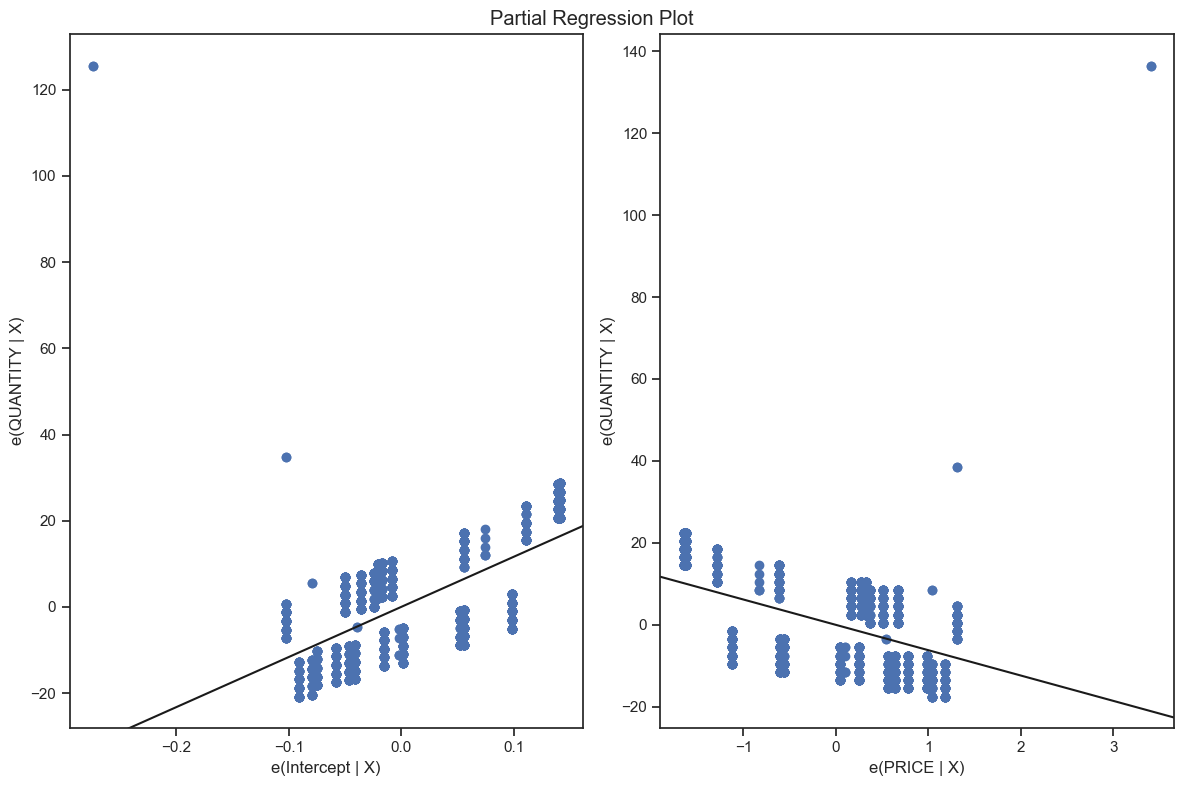

In [121]:
coke_data = bau2_data[bau2_data['ITEM_NAME'] == "COKE"]
create_model_and_find_elasticity(coke_data)

2 coke are available in combo, while 1 is available as single.. So it is likely that the bottom distribution belongs to single purchases of coke. Let's verfy this

In [122]:
coke_data.head(10)

,SELL_ID,SELL_CATEGORY,ITEM_NAME,CALENDAR_DATE,PRICE,QUANTITY,YEAR,HOLIDAY,IS_WEEKEND,IS_SCHOOLBREAK,AVERAGE_TEMPERATURE,IS_OUTDOOR
178,2051,2,COKE,1/14/14,13.27,24,2014,No Holiday,0,0,28.4,1
183,2053,2,COKE,1/14/14,12.37,52,2014,No Holiday,0,0,28.4,1
218,2051,2,COKE,1/15/15,11.53,36,2015,No Holiday,0,0,32.0,1
223,2053,2,COKE,1/15/15,10.81,56,2015,No Holiday,0,0,32.0,1
250,2051,2,COKE,1/16/15,11.53,32,2015,No Holiday,0,0,32.0,1
255,2053,2,COKE,1/16/15,10.81,60,2015,No Holiday,0,0,32.0,1
378,2051,2,COKE,1/2/15,11.53,30,2015,No Holiday,0,0,37.4,1
383,2053,2,COKE,1/2/15,10.81,60,2015,No Holiday,0,0,37.4,1
610,2051,2,COKE,1/27/12,12.73,28,2012,No Holiday,0,0,32.0,1
615,2053,2,COKE,1/27/12,12.60,46,2012,No Holiday,0,0,32.0,1


Price elasticity of the product: -5.7867091221732645
                            OLS Regression Results                            
Dep. Variable:               QUANTITY   R-squared:                       0.710
Model:                            OLS   Adj. R-squared:                  0.710
Method:                 Least Squares   F-statistic:                     1523.
Date:                Thu, 02 Mar 2023   Prob (F-statistic):          3.13e-169
Time:                        16:59:01   Log-Likelihood:                -1690.8
No. Observations:                 623   AIC:                             3386.
Df Residuals:                     621   BIC:                             3394.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------

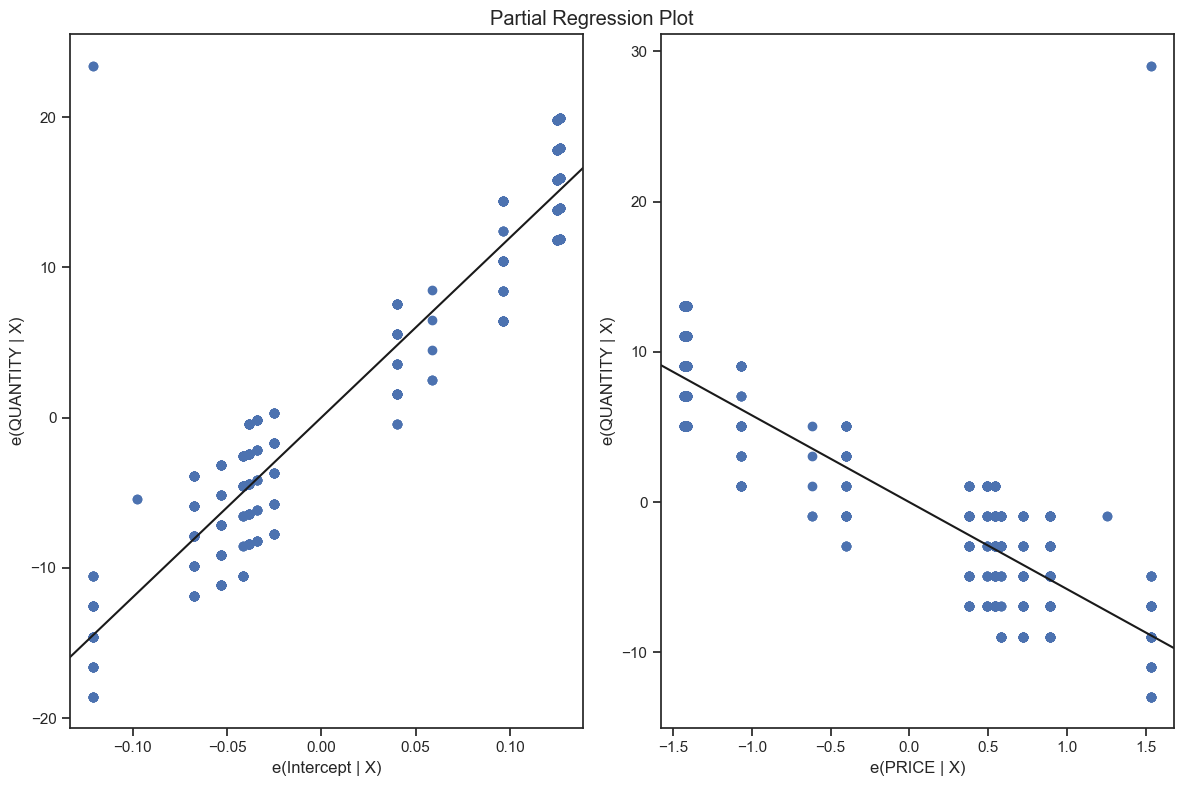

In [123]:
coke_data_2053 = bau2_data[(bau2_data['ITEM_NAME'] == "COKE") & (bau2_data['SELL_ID'] == 2053)]
elasticities['coke_2053'], model_coke_2053 = create_model_and_find_elasticity(coke_data_2053)

Price elasticity of the product: -0.6947406688026629
                            OLS Regression Results                            
Dep. Variable:               QUANTITY   R-squared:                       0.003
Model:                            OLS   Adj. R-squared:                  0.002
Method:                 Least Squares   F-statistic:                     2.035
Date:                Thu, 02 Mar 2023   Prob (F-statistic):              0.154
Time:                        16:59:02   Log-Likelihood:                -2261.7
No. Observations:                 623   AIC:                             4527.
Df Residuals:                     621   BIC:                             4536.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------

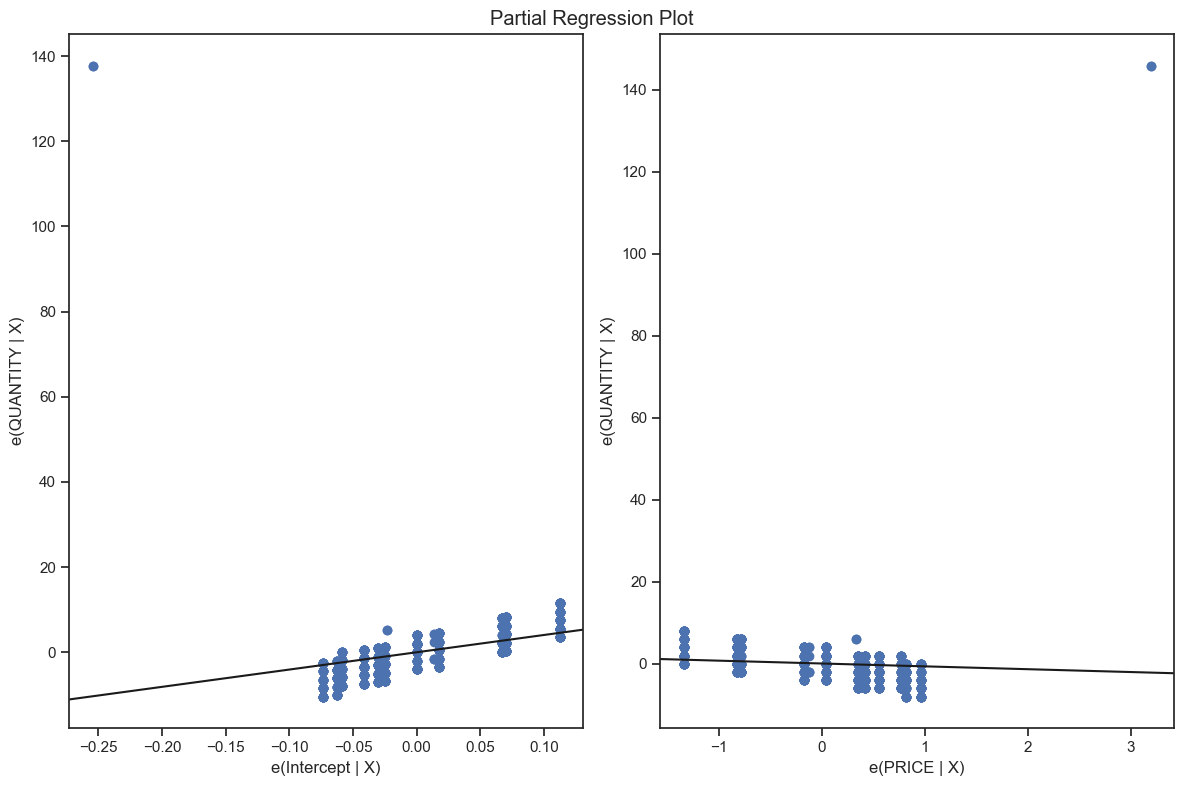

In [124]:
coke_data_2051 = bau2_data[(bau2_data['ITEM_NAME'] == "COKE") & (bau2_data['SELL_ID'] == 2051)]
elasticities['coke_2051'], model_coke_2051 = create_model_and_find_elasticity(coke_data_2051)


Price elasticity of the product: -2.0383181147068705
                            OLS Regression Results                            
Dep. Variable:               QUANTITY   R-squared:                       0.109
Model:                            OLS   Adj. R-squared:                  0.108
Method:                 Least Squares   F-statistic:                     75.93
Date:                Thu, 02 Mar 2023   Prob (F-statistic):           2.66e-17
Time:                        16:59:02   Log-Likelihood:                -1876.1
No. Observations:                 623   AIC:                             3756.
Df Residuals:                     621   BIC:                             3765.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------

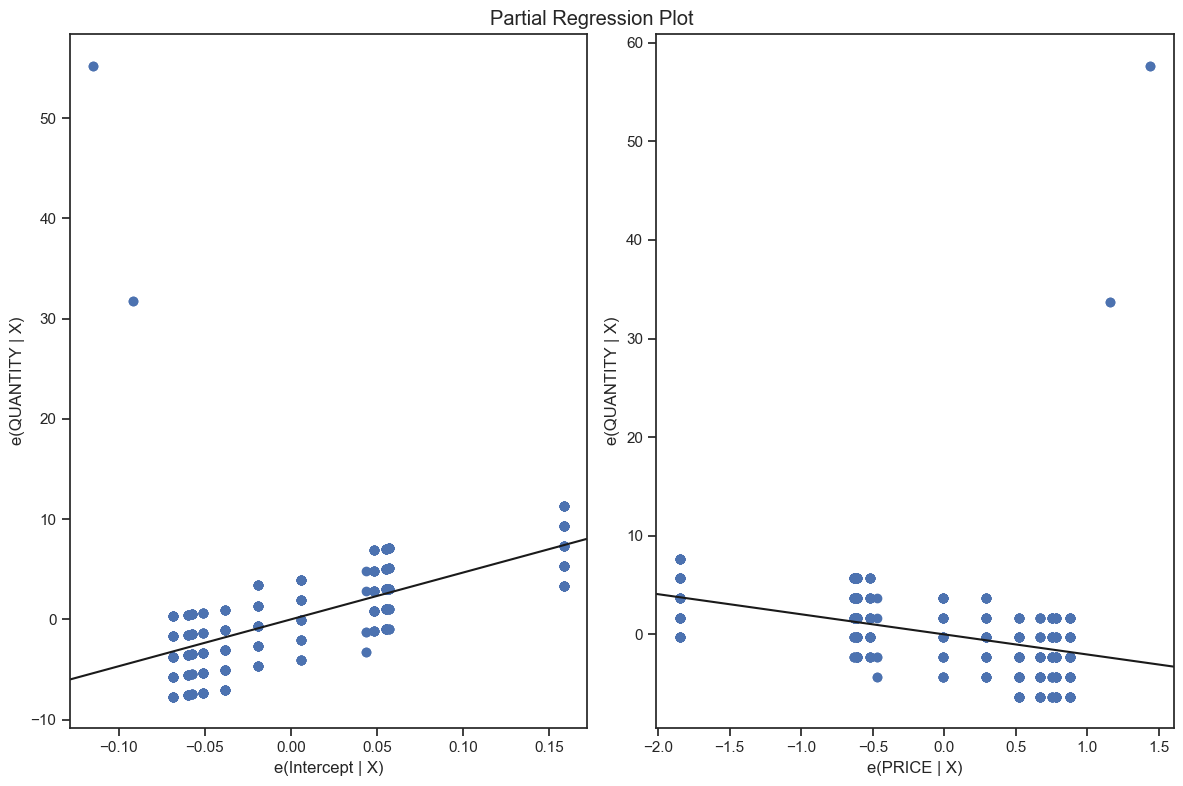

In [125]:
lemonade_data_2052 = bau2_data[(bau2_data['ITEM_NAME'] == "LEMONADE") & (bau2_data['SELL_ID'] == 2052)]
elasticities['lemonade_2052'], model_lemonade_2052 = create_model_and_find_elasticity(lemonade_data_2052)

In [126]:
lemonade_data_3028 = bau2_data[(bau2_data['ITEM_NAME'] == "LEMONADE") & (bau2_data['SELL_ID'] == 3028)]
elasticities['lemonade_3028'], model_lemonade_3028 = create_model_and_find_elasticity(lemonade_data_3028)

ValueError: zero-size array to reduction operation maximum which has no identity

Price elasticity of the product: -5.7867091221732645
                            OLS Regression Results                            
Dep. Variable:               QUANTITY   R-squared:                       0.710
Model:                            OLS   Adj. R-squared:                  0.710
Method:                 Least Squares   F-statistic:                     1523.
Date:                Wed, 01 Mar 2023   Prob (F-statistic):          3.13e-169
Time:                        12:09:21   Log-Likelihood:                -1690.8
No. Observations:                 623   AIC:                             3386.
Df Residuals:                     621   BIC:                             3394.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------

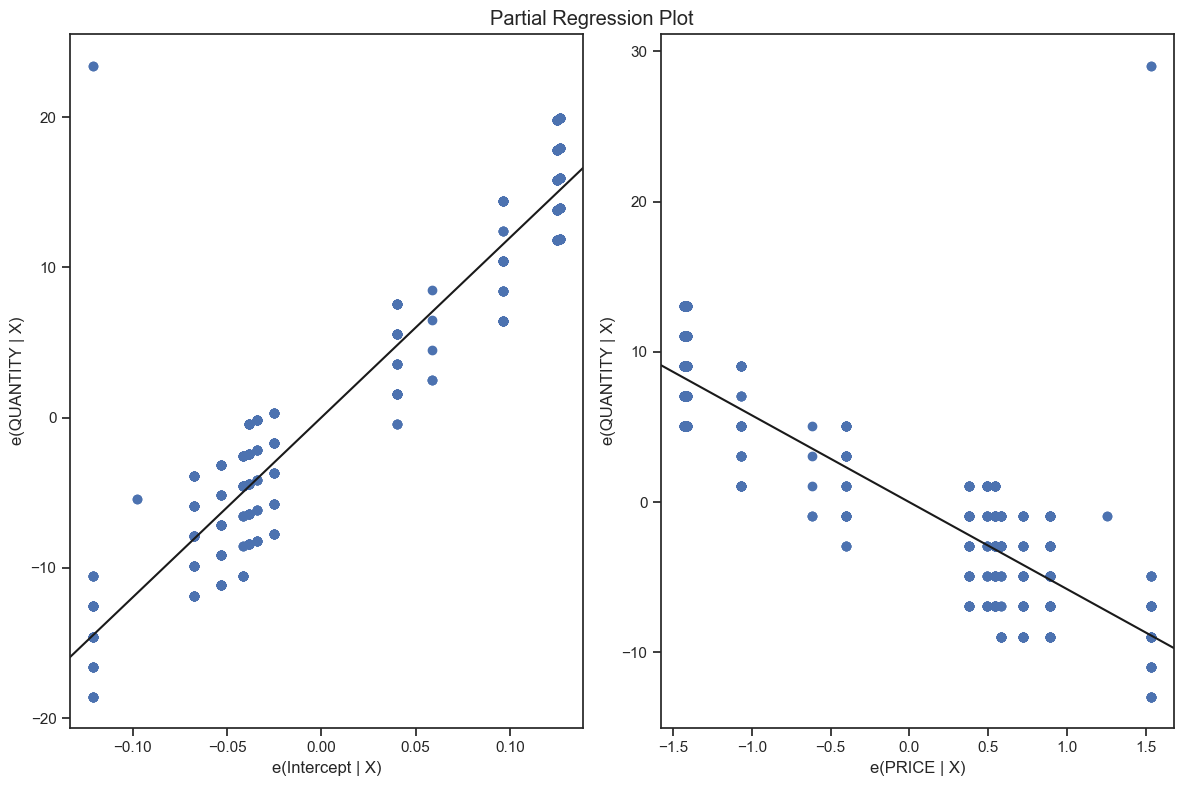

In [ ]:
coffee_data_2053 = bau2_data[(bau2_data['ITEM_NAME'] == "COFFEE") & (bau2_data['SELL_ID'] == 2053)]
elasticities['coffee_2053'], model_coffee_2053 = create_model_and_find_elasticity(coffee_data_2053)

In [ ]:
coffee_data_3055 = bau2_data[(bau2_data['ITEM_NAME'] == "COFFEE") & (bau2_data['SELL_ID'] == 3055)]
elasticities['coffee_3055'], model_coffee_3055 = create_model_and_find_elasticity(coffee_data_3055)

ValueError: zero-size array to reduction operation maximum which has no identity

## List in a table the items and their price elasticities

In [127]:
elasticities

{'burger_1070': -7.45579348482817,
 'burger_2051': -0.6947406688026629,
 'burger_2052': -2.0383181147068705,
 'burger_2053': -5.7867091221732645,
 'coke_2053': -5.7867091221732645,
 'coke_2051': -0.6947406688026629,
 'lemonade_2052': -2.0383181147068705}

# Find optimal price for maximum profit

Now, let's take coke (the sell_id was 2051 for the last coke data) and since we do not the buying price of coke, let''s assume it to be a little less than the minimum coke price in the dataset

In [128]:
coke_data = coke_data_2053

In [129]:
coke_data.PRICE.min()

10.45

In [130]:
coke_data.PRICE.max()

13.41

In [131]:
buying_price_coke = 9

In [132]:
start_price = 9.5
end_price = 20

In [133]:
test = pd.DataFrame(columns = ["PRICE", "QUANTITY"])

In [134]:
test['PRICE'] = np.arange(start_price, end_price,0.01)

In [135]:
test['QUANTITY'] = model_coke_2051.predict(test['PRICE'])

In [136]:
test.head(5)

,PRICE,QUANTITY
0,9.50,34.032723
1,9.51,34.025776
2,9.52,34.018829
3,9.53,34.011881
4,9.54,34.004934


In [137]:
test['PROFIT'] = (test["PRICE"] - buying_price_coke) * test["QUANTITY"]

In [140]:
test.head(5)

,PRICE,QUANTITY,PROFIT
0,9.50,34.032723,17.016362
1,9.51,34.025776,17.353146
2,9.52,34.018829,17.689791
3,9.53,34.011881,18.026297
4,9.54,34.004934,18.362664


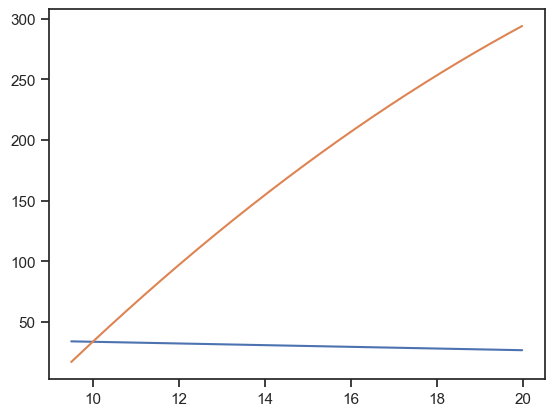

In [141]:
plt.plot(test['PRICE'],test['QUANTITY'])
plt.plot(test['PRICE'],test['PROFIT'])
plt.show()

In [142]:
ind = np.where(test['PROFIT'] == test['PROFIT'].max())[0][0]

In [143]:
test.loc[[ind]]

,PRICE,QUANTITY,PROFIT
1049,19.99,26.744894,293.926383


In [144]:
test.head()

,PRICE,QUANTITY,PROFIT
0,9.50,34.032723,17.016362
1,9.51,34.025776,17.353146
2,9.52,34.018829,17.689791
3,9.53,34.011881,18.026297
4,9.54,34.004934,18.362664


In [145]:
burger_1070.head()

,SELL_ID,SELL_CATEGORY,ITEM_NAME,CALENDAR_DATE,PRICE,QUANTITY,YEAR,HOLIDAY,IS_WEEKEND,IS_SCHOOLBREAK,AVERAGE_TEMPERATURE,IS_OUTDOOR
176,1070,0,BURGER,1/14/14,15.5,86,2014,No Holiday,0,0,28.4,1
216,1070,0,BURGER,1/15/15,14.0,104,2015,No Holiday,0,0,32.0,1
248,1070,0,BURGER,1/16/15,14.0,100,2015,No Holiday,0,0,32.0,1
376,1070,0,BURGER,1/2/15,14.0,102,2015,No Holiday,0,0,37.4,1
608,1070,0,BURGER,1/27/12,15.5,86,2012,No Holiday,0,0,32.0,1


In [146]:
burger_1070.PRICE.min()

12.64

In [147]:
def find_optimal_price(data, model, buying_price):
    start_price = data.PRICE.min() - 1
    end_price = data.PRICE.min() + 10
    test = pd.DataFrame(columns = ["PRICE", "QUANTITY"])
    test['PRICE'] = np.arange(start_price, end_price,0.01)
    test['QUANTITY'] = model.predict(test['PRICE'])
    test['PROFIT'] = (test["PRICE"] - buying_price) * test["QUANTITY"]
    plt.plot(test['PRICE'],test['QUANTITY'])
    plt.plot(test['PRICE'],test['PROFIT'])
    plt.show()
    ind = np.where(test['PROFIT'] == test['PROFIT'].max())[0][0]
    values_at_max_profit = test.iloc[[ind]]
    return values_at_max_profit
    

## Calculate the optimal price for all and list in table

In [148]:
optimal_price = {}
buying_price = 9

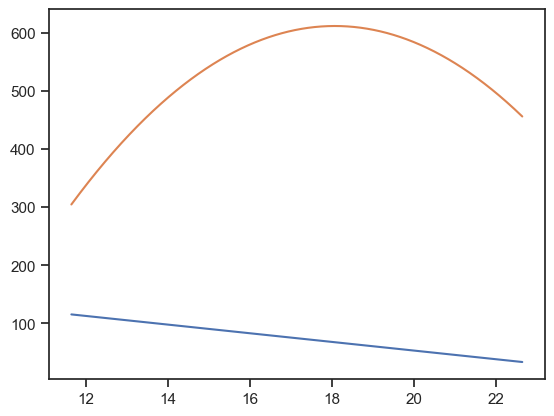

In [149]:
optimal_price['burger_1070'] = find_optimal_price(burger_1070, model_burger_1070, buying_price)

In [150]:
optimal_price

{'burger_1070':      PRICE   QUANTITY      PROFIT
 642  18.06  67.541907  611.929679}

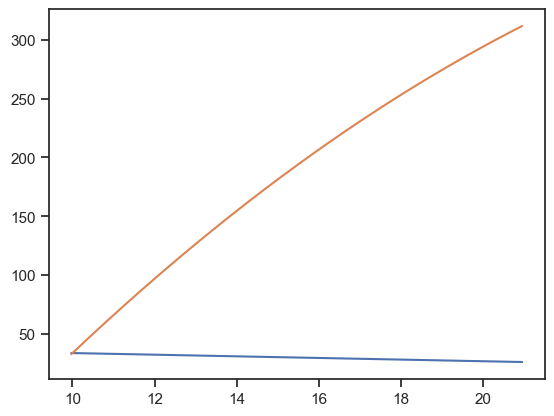

In [151]:
optimal_price['burger_2051'] = find_optimal_price(burger2051_data, model_burger_2051, buying_price)

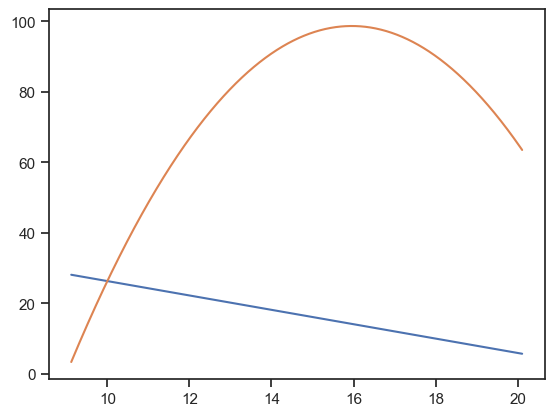

In [152]:
optimal_price['burger_2052'] = find_optimal_price(burger2052_data, model_burger_2052, buying_price)

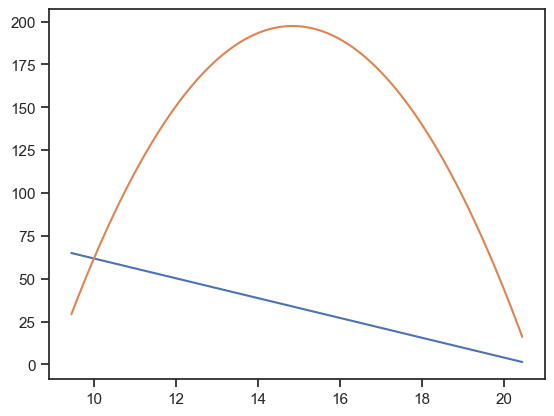

In [153]:
optimal_price['burger_2053'] = find_optimal_price(burger2053_data, model_burger_2053, buying_price)

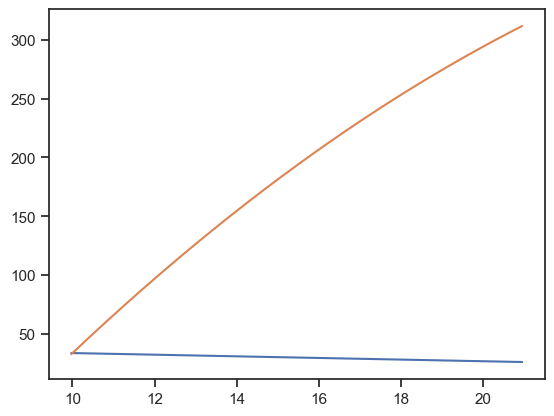

In [154]:
optimal_price['coke_2051'] = find_optimal_price(coke_data_2051, model_coke_2051, buying_price)

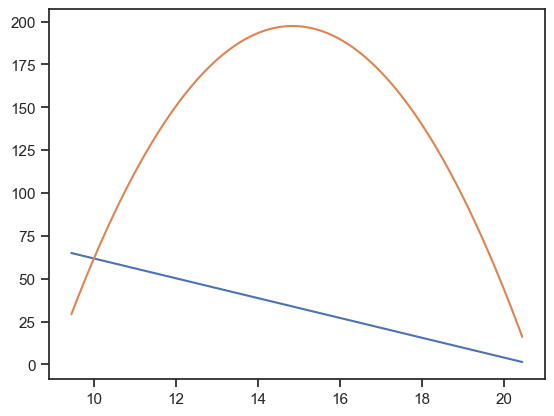

In [155]:
optimal_price['coke_2053'] = find_optimal_price(coke_data_2053, model_coke_2053, buying_price)

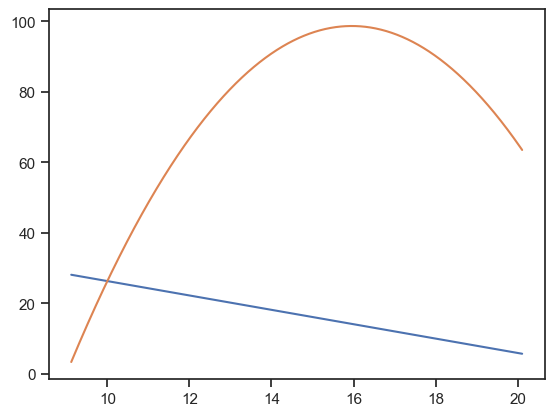

In [156]:
optimal_price['lemonade_2052'] = find_optimal_price(lemonade_data_2052, model_lemonade_2052, buying_price)

In [ ]:
optimal_price['coffee_2053'] = find_optimal_price(coffee_data_2053, model_coffee_2053, buying_price)

NameError: name 'coffee_data_2053' is not defined

In [ ]:
optimal_price

{'burger_1070':      PRICE   QUANTITY      PROFIT
 642  18.06  67.541907  611.929679,
 'burger_2051':       PRICE   QUANTITY      PROFIT
 1099  20.96  26.070995  311.809105,
 'burger_2052':      PRICE   QUANTITY     PROFIT
 684  15.96  14.175235  98.659638,
 'burger_2053':      PRICE   QUANTITY      PROFIT
 539  14.84  33.810186  197.451487,
 'coke_2051':       PRICE   QUANTITY      PROFIT
 1099  20.96  26.070995  311.809105,
 'coke_2053':      PRICE   QUANTITY      PROFIT
 539  14.84  33.810186  197.451487,
 'lemonade_2052':      PRICE   QUANTITY     PROFIT
 684  15.96  14.175235  98.659638}

In [ ]:
coke_data_2053.to_csv(r'C:\Users\AW581PP\OneDrive - EY\Documents\EY D&A\nocode-ml-example\Model comparasions\processedDataSets\coke_data_2053.csv')
lemonade_data_2052.to_csv(r'C:\Users\AW581PP\OneDrive - EY\Documents\EY D&A\nocode-ml-example\Model comparasions\processedDataSets\lemonade_data_2052.csv')

In [ ]:
coke_data_2051.PRICE.describe()

count    623.000000
mean      12.310353
std        0.752657
min       10.970000
25%       11.530000
50%       12.350000
75%       12.870000
max       15.500000
Name: PRICE, dtype: float64

# Conclusion

This is the price the cafe should set on it's item to earn maximum profit based on it's previous sales data. It is important to note that this is on a normal day. On 'other' days such as a holiday, or an event taking place have a different impact on customer buying behaviours and pattern. Usually an increase in consumption is seen on such days. These must be treated separately. Similarly, it is important to remove any external effects other than price that will affect the purchase behaviours of customers including the datapoints when the item was on discount.

Once, the new prices are put up, it is important to continuously monitor the sales and profit. If this method of pricing is a part of a rpoduct, a dashboard can be created for the purpose of monitoring these items and calculating the lift in the profit.